In [ ]:
pip install SMOTE

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#pip install imblearn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#from imblearn.over_sampling import SMOTE
#from imblearn.under_sampling import NeighbourhoodCleaningRule
#from imblearn.under_sampling import NearMiss
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA, KernelPCA
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import cohen_kappa_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import pickle

In [ ]:
#drought_df = pd.read_csv(r"/Users/sopheahummel/Desktop/Summer2022/718/test_timeseries.csv")
drought_df = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/Project/test_timeseries.csv")
drought_df.head()

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,1001,2019-01-01,2.25,100.51,9.69,14.71,13.55,13.52,17.38,10.92,...,14.63,1.20,1.50,0.79,0.71,2.74,4.01,1.23,2.78,0.0
1,1001,2019-01-02,4.94,100.48,8.65,13.05,11.83,11.74,17.76,9.54,...,13.06,1.02,1.35,0.32,1.03,2.13,3.37,0.56,2.81,NaN
2,1001,2019-01-03,20.74,100.03,8.59,12.12,11.67,11.67,13.74,10.44,...,12.12,1.83,4.23,0.34,3.88,3.41,7.49,0.72,6.77,NaN
3,1001,2019-01-04,16.17,99.47,7.93,11.80,10.38,9.59,18.19,5.44,...,11.72,3.75,5.25,2.34,2.91,6.78,9.61,4.90,4.71,NaN
4,1001,2019-01-05,0.01,100.39,5.32,7.91,4.73,4.71,14.37,3.68,...,7.75,2.32,2.90,1.69,1.21,4.42,5.87,3.15,2.72,NaN


In [ ]:
drought_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2271948 entries, 0 to 2271947
Data columns (total 21 columns):
 #   Column       Dtype  
---  ------       -----  
 0   fips         int64  
 1   date         object 
 2   PRECTOT      float64
 3   PS           float64
 4   QV2M         float64
 5   T2M          float64
 6   T2MDEW       float64
 7   T2MWET       float64
 8   T2M_MAX      float64
 9   T2M_MIN      float64
 10  T2M_RANGE    float64
 11  TS           float64
 12  WS10M        float64
 13  WS10M_MAX    float64
 14  WS10M_MIN    float64
 15  WS10M_RANGE  float64
 16  WS50M        float64
 17  WS50M_MAX    float64
 18  WS50M_MIN    float64
 19  WS50M_RANGE  float64
 20  score        float64
dtypes: float64(19), int64(1), object(1)
memory usage: 364.0+ MB


In [ ]:
drought_df.isnull().sum()

fips                 0
date                 0
PRECTOT              0
PS                   0
QV2M                 0
T2M                  0
T2MDEW               0
T2MWET               0
T2M_MAX              0
T2M_MIN              0
T2M_RANGE            0
TS                   0
WS10M                0
WS10M_MAX            0
WS10M_MIN            0
WS10M_RANGE          0
WS50M                0
WS50M_MAX            0
WS50M_MIN            0
WS50M_RANGE          0
score          1945608
dtype: int64

In [ ]:
# Removing the null values in the target variable as the drought score is only available for once in 7 days.
drought_df = drought_df.dropna()
drought_df.isnull().sum()

fips           0
date           0
PRECTOT        0
PS             0
QV2M           0
T2M            0
T2MDEW         0
T2MWET         0
T2M_MAX        0
T2M_MIN        0
T2M_RANGE      0
TS             0
WS10M          0
WS10M_MAX      0
WS10M_MIN      0
WS10M_RANGE    0
WS50M          0
WS50M_MAX      0
WS50M_MIN      0
WS50M_RANGE    0
score          0
dtype: int64

In [ ]:
drought_df.dtypes

fips             int64
date            object
PRECTOT        float64
PS             float64
QV2M           float64
T2M            float64
T2MDEW         float64
T2MWET         float64
T2M_MAX        float64
T2M_MIN        float64
T2M_RANGE      float64
TS             float64
WS10M          float64
WS10M_MAX      float64
WS10M_MIN      float64
WS10M_RANGE    float64
WS50M          float64
WS50M_MAX      float64
WS50M_MIN      float64
WS50M_RANGE    float64
score          float64
dtype: object

In [ ]:
drought_df['year'] = pd.DatetimeIndex(drought_df['date']).year
drought_df['month'] = pd.DatetimeIndex(drought_df['date']).month
drought_df['day'] = pd.DatetimeIndex(drought_df['date']).day
drought_df['score'] = drought_df['score'].round().astype(int)
drought_df.dtypes

fips             int64
date            object
PRECTOT        float64
PS             float64
QV2M           float64
T2M            float64
T2MDEW         float64
T2MWET         float64
T2M_MAX        float64
T2M_MIN        float64
T2M_RANGE      float64
TS             float64
WS10M          float64
WS10M_MAX      float64
WS10M_MIN      float64
WS10M_RANGE    float64
WS50M          float64
WS50M_MAX      float64
WS50M_MIN      float64
WS50M_RANGE    float64
score            int64
year             int64
month            int64
day              int64
dtype: object

In [ ]:
drought_df['fips'].nunique()

3108

In [ ]:
drought_df['score'].round().value_counts()

0    247720
1     42486
2     22159
3      9590
4      3578
5       807
Name: score, dtype: int64

In [ ]:
# Univariate Analysis-Descriptive statistics
display(drought_df.describe()) # For numeric columns
display(drought_df.describe(include=['object'])) # For Categorical columns
print("\nSkewness: \n", drought_df.skew(axis = 0, skipna = True))
print("\nKurtosis: \n", drought_df.kurtosis(axis = 0, skipna = True))

,fips,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,...,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score,year,month,day
count,326340.000000,326340.000000,326340.000000,326340.00000,326340.000000,326340.000000,326340.000000,326340.000000,326340.000000,326340.000000,...,326340.000000,326340.000000,326340.00000,326340.000000,326340.000000,326340.000000,326340.000000,326340.000000,326340.000000,326340.000000
mean,30670.376770,2.773609,96.664013,8.19353,12.809354,7.637028,7.681143,18.447932,7.651906,10.796031,...,1.874162,3.260994,5.45473,7.736035,3.049395,4.686642,0.410373,2019.495238,6.552381,15.733333
std,14979.130338,6.271320,5.439992,4.95683,10.990227,10.524875,10.260454,11.575784,10.755246,3.835380,...,1.275018,1.934575,2.20415,2.747975,2.024862,2.163710,0.857390,0.499978,3.480511,8.851451
min,1001.000000,0.000000,66.930000,0.15000,-34.690000,-37.840000,-34.830000,-28.350000,-41.960000,0.120000,...,0.000000,0.260000,0.70000,1.270000,0.000000,0.530000,0.000000,2019.000000,1.000000,1.000000
25%,19044.500000,0.000000,95.860000,3.91000,4.380000,-0.360000,-0.240000,9.880000,-0.530000,8.060000,...,0.950000,1.800000,3.80000,5.660000,1.450000,3.140000,0.000000,2019.000000,4.000000,8.000000
50%,29212.000000,0.200000,98.310000,7.05000,13.950000,8.200000,8.060000,20.290000,8.140000,10.670000,...,1.630000,2.810000,5.11000,7.280000,2.720000,4.250000,0.000000,2019.000000,7.000000,16.000000
75%,46007.500000,2.540000,99.970000,12.19000,22.070000,16.830000,16.690000,27.790000,16.630000,13.420000,...,2.520000,4.250000,6.77000,9.380000,4.300000,5.770000,0.000000,2020.000000,10.000000,23.000000
max,56043.000000,234.800000,103.790000,21.80000,39.110000,26.710000,26.620000,46.830000,32.320000,26.180000,...,15.440000,19.110000,20.33000,28.740000,18.370000,22.850000,5.000000,2020.000000,12.000000,31.000000


,date
count,326340
unique,105
top,2019-01-01
freq,3108



Skewness: 
 fips          -0.077368
PRECTOT        4.672804
PS            -2.144200
QV2M           0.493964
T2M           -0.416752
T2MDEW        -0.365210
T2MWET        -0.302190
T2M_MAX       -0.456988
T2M_MIN       -0.368619
T2M_RANGE      0.157075
TS            -0.391106
WS10M          1.037704
WS10M_MAX      0.908820
WS10M_MIN      1.285984
WS10M_RANGE    1.312437
WS50M          0.806169
WS50M_MAX      0.892746
WS50M_MIN      0.815506
WS50M_RANGE    1.257341
score          2.385498
year           0.019049
month         -0.007572
day            0.002928
dtype: float64

Kurtosis: 
 fips           -1.100134
PRECTOT        37.337228
PS              4.856370
QV2M           -0.919667
T2M            -0.545738
T2MDEW         -0.612593
T2MWET         -0.723959
T2M_MAX        -0.522698
T2M_MIN        -0.368068
T2M_RANGE      -0.340927
TS             -0.522508
WS10M           1.078433
WS10M_MAX       0.695609
WS10M_MIN       2.584700
WS10M_RANGE     2.278172
WS50M           0.607371
WS50M_M

In [ ]:
column_list = list(drought_df.columns)
column_list

['fips',
 'date',
 'PRECTOT',
 'PS',
 'QV2M',
 'T2M',
 'T2MDEW',
 'T2MWET',
 'T2M_MAX',
 'T2M_MIN',
 'T2M_RANGE',
 'TS',
 'WS10M',
 'WS10M_MAX',
 'WS10M_MIN',
 'WS10M_RANGE',
 'WS50M',
 'WS50M_MAX',
 'WS50M_MIN',
 'WS50M_RANGE',
 'score',
 'year',
 'month',
 'day']

In [ ]:
#loading and verifying columns to be merged
soil_df = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/Project/soil_data.csv")
list(soil_df.columns)

['fips',
 'lat',
 'lon',
 'elevation',
 'slope1',
 'slope2',
 'slope3',
 'slope4',
 'slope5',
 'slope6',
 'slope7',
 'slope8',
 'aspectN',
 'aspectE',
 'aspectS',
 'aspectW',
 'aspectUnknown',
 'WAT_LAND',
 'NVG_LAND',
 'URB_LAND',
 'GRS_LAND',
 'FOR_LAND',
 'CULTRF_LAND',
 'CULTIR_LAND',
 'CULT_LAND',
 'SQ1',
 'SQ2',
 'SQ3',
 'SQ4',
 'SQ5',
 'SQ6',
 'SQ7']

In [ ]:
#Merging datasets
merge_df = drought_df.merge(soil_df, on='fips', how='left')
list(merge_df.columns)

['fips',
 'date',
 'PRECTOT',
 'PS',
 'QV2M',
 'T2M',
 'T2MDEW',
 'T2MWET',
 'T2M_MAX',
 'T2M_MIN',
 'T2M_RANGE',
 'TS',
 'WS10M',
 'WS10M_MAX',
 'WS10M_MIN',
 'WS10M_RANGE',
 'WS50M',
 'WS50M_MAX',
 'WS50M_MIN',
 'WS50M_RANGE',
 'score',
 'year',
 'month',
 'day',
 'lat',
 'lon',
 'elevation',
 'slope1',
 'slope2',
 'slope3',
 'slope4',
 'slope5',
 'slope6',
 'slope7',
 'slope8',
 'aspectN',
 'aspectE',
 'aspectS',
 'aspectW',
 'aspectUnknown',
 'WAT_LAND',
 'NVG_LAND',
 'URB_LAND',
 'GRS_LAND',
 'FOR_LAND',
 'CULTRF_LAND',
 'CULTIR_LAND',
 'CULT_LAND',
 'SQ1',
 'SQ2',
 'SQ3',
 'SQ4',
 'SQ5',
 'SQ6',
 'SQ7']

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 4.0 MB/s 
     |████████████████████████████████| 6.3 MB 36.8 MB/s 
     |████████████████████████████████| 16.7 MB 29.9 MB/s 


In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd

In [ ]:
county = "/content/drive/MyDrive/Colab Notebooks/Project/shp/CountiesBEA.shp"
mapdf = gpd.read_file(county)
nydf = gpd.read_file("/content/drive/MyDrive/Colab Notebooks/Project/ny/tl_2016_36_cousub.shp")

In [ ]:
mapdf.head()

,OBJECTID,FIPS_BEA,Shape_Leng,Shape_Area,geometry
0,1,1001.0,2.015303,0.150257,"POLYGON ((-86.41312 32.70739, -86.41304 32.687..."
1,2,1003.0,4.243962,0.409825,"POLYGON ((-87.76515 31.29735, -87.76360 31.297..."
2,3,1005.0,2.441082,0.223192,"POLYGON ((-85.35541 32.14717, -85.32444 32.147..."
3,4,1007.0,1.893893,0.156433,"POLYGON ((-87.06574 33.24691, -87.04483 33.246..."
4,5,1009.0,2.334544,0.164441,"POLYGON ((-86.48693 34.26021, -86.45288 34.259..."


In [ ]:
nydf.head()

,STATEFP,COUNTYFP,COUSUBFP,COUSUBNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CNECTAFP,NECTAFP,NCTADVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,36,017,55959,00979335,3601755959,Oxford,Oxford town,43,T1,G4040,None,None,None,A,155563470,911062,+42.3970735,-075.5962276,"POLYGON ((-75.67459 42.38286, -75.67432 42.382..."
1,36,017,57507,00979360,3601757507,Pharsalia,Pharsalia town,43,T1,G4040,None,None,None,A,100533128,774336,+42.5976196,-075.7338789,"POLYGON ((-75.79645 42.63828, -75.79172 42.638..."
2,36,017,58288,00979370,3601758288,Pitcher,Pitcher town,43,T1,G4040,None,None,None,A,73723336,37391,+42.5875820,-075.8279559,"POLYGON ((-75.88232 42.63770, -75.88167 42.637..."
3,36,017,59817,00979398,3601759817,Preston,Preston town,43,T1,G4040,None,None,None,A,90327313,443458,+42.5033261,-075.6103565,"POLYGON ((-75.67005 42.55087, -75.66985 42.550..."
4,36,017,66894,00979490,3601766894,Sherburne,Sherburne town,43,T1,G4040,None,None,None,A,112803620,51669,+42.6939737,-075.4812144,"POLYGON ((-75.55251 42.73940, -75.55138 42.739..."


In [ ]:
nymerge = nydf[['STATEFP', 'COUNTYFP']]
nymerge.head()

,STATEFP,COUNTYFP
0,36,017
1,36,017
2,36,017
3,36,017
4,36,017


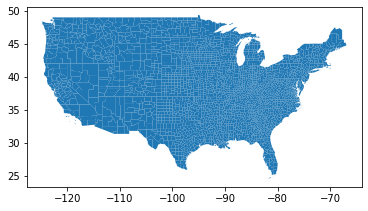

In [ ]:
mapdf.plot()

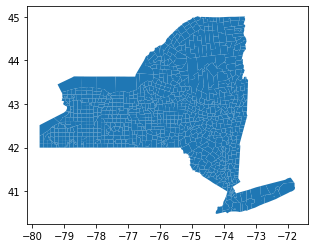

In [ ]:
nydf.plot()

In [ ]:
merge_df['fips'] = pd.to_numeric(merge_df['fips'])

In [ ]:
temp = merge_df[merge_df['fips']<2000]
temp.head(10000)

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,CULTRF_LAND,CULTIR_LAND,CULT_LAND,SQ1,SQ2,SQ3,SQ4,SQ5,SQ6,SQ7
0,1001,2019-01-01,2.25,100.51,9.69,14.71,13.55,13.52,17.38,10.92,...,56.293411,1.014811,57.308224,1,1,1,1,1,1,2
1,1001,2019-01-08,0.05,100.57,8.75,13.15,12.01,11.98,20.04,9.36,...,56.293411,1.014811,57.308224,1,1,1,1,1,1,2
2,1001,2019-01-15,0.00,101.07,4.04,3.91,0.94,0.96,9.40,1.02,...,56.293411,1.014811,57.308224,1,1,1,1,1,1,2
3,1001,2019-01-22,0.03,101.14,4.96,6.03,3.81,3.08,12.43,-1.63,...,56.293411,1.014811,57.308224,1,1,1,1,1,1,2
4,1001,2019-01-29,5.79,100.36,3.69,2.23,-0.41,-1.03,7.33,-5.19,...,56.293411,1.014811,57.308224,1,1,1,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7030,1133,2020-12-01,0.00,99.67,2.51,0.11,-5.61,-2.75,6.26,-5.37,...,0.620471,0.028126,0.648597,3,2,1,1,1,1,1
7031,1133,2020-12-08,0.00,99.53,3.88,2.95,0.18,1.56,10.41,-2.43,...,0.620471,0.028126,0.648597,3,2,1,1,1,1,1
7032,1133,2020-12-15,2.25,99.32,4.37,3.00,1.75,2.38,9.12,-4.17,...,0.620471,0.028126,0.648597,3,2,1,1,1,1,1
7033,1133,2020-12-22,0.03,99.83,4.59,7.29,2.58,4.94,14.40,3.61,...,0.620471,0.028126,0.648597,3,2,1,1,1,1,1


In [ ]:
maptest = mapdf.set_index('FIPS_BEA').join(temp.set_index('fips'))



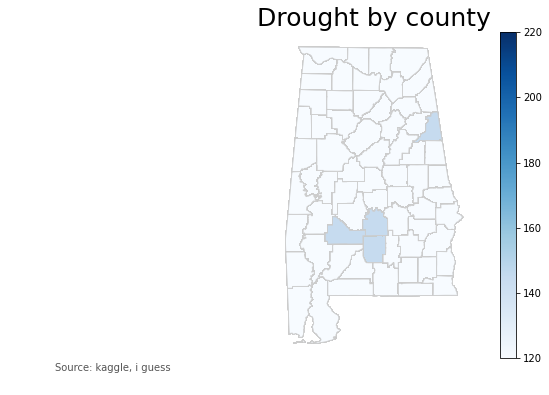

In [ ]:
variable = 'score'

# set the range for the choropleth
vmin, vmax = 120, 220

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

# create map
maptest.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# Now we can customise and add annotations

# remove the axis
ax.axis('off')

# add a title
ax.set_title('Drought by county', \
              fontdict={'fontsize': '25',
                        'fontweight' : '3'})

# create an annotation for the  data source
ax.annotate('Source: kaggle, i guess',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

# this will save the figure as a high-res png. you can also save as svg
fig.savefig('testmap.png', dpi=300)

In [ ]:
temp = merge_df
temp["date"] = temp["date"].str.replace("-","")

full_test = mapdf.set_index('FIPS_BEA').join(temp.set_index('fips'))
full_test.head(10000)

,OBJECTID,Shape_Leng,Shape_Area,geometry,date,PRECTOT,PS,QV2M,T2M,T2MDEW,...,CULTRF_LAND,CULTIR_LAND,CULT_LAND,SQ1,SQ2,SQ3,SQ4,SQ5,SQ6,SQ7
1001.0,1,2.015303,0.150257,"POLYGON ((-86.41312 32.70739, -86.41304 32.687...",20190101,2.25,100.51,9.69,14.71,13.55,...,5.629341e+01,1.014811,57.308224,1.0,1.0,1.0,1.0,1.0,1.0,2.0
1001.0,1,2.015303,0.150257,"POLYGON ((-86.41312 32.70739, -86.41304 32.687...",20190108,0.05,100.57,8.75,13.15,12.01,...,5.629341e+01,1.014811,57.308224,1.0,1.0,1.0,1.0,1.0,1.0,2.0
1001.0,1,2.015303,0.150257,"POLYGON ((-86.41312 32.70739, -86.41304 32.687...",20190115,0.00,101.07,4.04,3.91,0.94,...,5.629341e+01,1.014811,57.308224,1.0,1.0,1.0,1.0,1.0,1.0,2.0
1001.0,1,2.015303,0.150257,"POLYGON ((-86.41312 32.70739, -86.41304 32.687...",20190122,0.03,101.14,4.96,6.03,3.81,...,5.629341e+01,1.014811,57.308224,1.0,1.0,1.0,1.0,1.0,1.0,2.0
1001.0,1,2.015303,0.150257,"POLYGON ((-86.41312 32.70739, -86.41304 32.687...",20190129,5.79,100.36,3.69,2.23,-0.41,...,5.629341e+01,1.014811,57.308224,1.0,1.0,1.0,1.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5027.0,96,1.843525,0.192095,"POLYGON ((-93.24568 33.44204, -93.22129 33.440...",20190521,9.27,99.57,16.39,25.17,21.76,...,1.862645e-09,0.020429,0.020429,3.0,2.0,1.0,2.0,1.0,1.0,1.0
5027.0,96,1.843525,0.192095,"POLYGON ((-93.24568 33.44204, -93.22129 33.440...",20190528,0.00,99.91,17.20,26.57,22.62,...,1.862645e-09,0.020429,0.020429,3.0,2.0,1.0,2.0,1.0,1.0,1.0
5027.0,96,1.843525,0.192095,"POLYGON ((-93.24568 33.44204, -93.22129 33.440...",20190604,6.10,100.43,17.91,27.15,23.36,...,1.862645e-09,0.020429,0.020429,3.0,2.0,1.0,2.0,1.0,1.0,1.0
5027.0,96,1.843525,0.192095,"POLYGON ((-93.24568 33.44204, -93.22129 33.440...",20190611,0.00,100.90,10.62,21.28,15.15,...,1.862645e-09,0.020429,0.020429,3.0,2.0,1.0,2.0,1.0,1.0,1.0


In [ ]:
temp3 = temp
temp3[temp3['date'] == "20200714"]


,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,CULTRF_LAND,CULTIR_LAND,CULT_LAND,SQ1,SQ2,SQ3,SQ4,SQ5,SQ6,SQ7
80,1001,20200714,0.16,99.98,15.29,29.17,20.80,20.62,36.08,22.43,...,56.293411,1.014811,57.308224,1,1,1,1,1,1,2
185,1003,20200714,6.34,101.01,19.80,29.33,25.14,25.00,33.60,26.52,...,59.843639,2.996914,62.840553,3,2,1,2,1,1,1
290,1005,20200714,1.41,100.18,16.55,30.05,22.12,21.85,36.91,23.85,...,72.578804,1.828159,74.406960,3,2,1,1,1,1,1
395,1007,20200714,0.22,99.92,15.33,28.59,20.83,20.65,35.25,21.68,...,1.916593,0.008330,1.924924,3,2,1,1,1,1,1
500,1009,20200714,0.00,99.22,14.99,27.53,20.35,20.17,34.29,21.28,...,1.891909,0.027488,1.919397,3,2,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325895,56035,20200714,0.22,76.16,5.08,14.50,0.05,-0.03,21.84,7.14,...,1.296579,2.276501,3.573080,1,1,2,1,1,1,2
326000,56037,20200714,0.07,78.88,5.10,20.25,0.60,0.27,28.32,11.82,...,0.000000,0.000000,0.000000,1,1,3,1,1,1,3
326105,56039,20200714,0.00,76.74,5.11,12.11,0.29,0.23,18.04,5.38,...,2.922309,0.000000,2.922309,1,1,1,1,1,1,1
326210,56041,20200714,0.00,76.62,5.16,17.16,0.36,0.41,25.63,9.14,...,1.013702,10.755590,11.769293,1,1,2,1,1,1,2


In [ ]:
validtest = mapdf.set_index('FIPS_BEA').join(temp3.set_index('fips'))

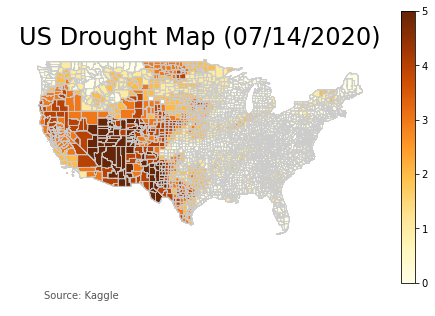

In [ ]:
variable = 'score'

# set the range for the choropleth
vmin, vmax = 0, 5

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(8, 5))

# create map
validtest.plot(column=variable, cmap='YlOrBr', linewidth=0.8, ax=ax, edgecolor='0.8')

# Now we can customise and add annotations

# remove the axis
ax.axis('off')

# add a title
ax.set_title('US Drought Map (07/14/2020)', \
              fontdict={'fontsize': '24',
                        'fontweight' : '3'})

# create an annotation for the  data source
ax.annotate('Source: Kaggle',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='YlOrBr', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

# this will save the figure as a high-res png. you can also save as svg
fig.savefig('USdrought.png', dpi=300)

In [ ]:
temp = merge_df[merge_df["fips"]==1001]

In [ ]:
i = 0

# list of days
list_of_days = temp.date.values.tolist()
print(list_of_days)

['20190101', '20190108', '20190115', '20190122', '20190129', '20190205', '20190212', '20190219', '20190226', '20190305', '20190312', '20190319', '20190326', '20190402', '20190409', '20190416', '20190423', '20190430', '20190507', '20190514', '20190521', '20190528', '20190604', '20190611', '20190618', '20190625', '20190702', '20190709', '20190716', '20190723', '20190730', '20190806', '20190813', '20190820', '20190827', '20190903', '20190910', '20190917', '20190924', '20191001', '20191008', '20191015', '20191022', '20191029', '20191105', '20191112', '20191119', '20191126', '20191203', '20191210', '20191217', '20191224', '20191231', '20200107', '20200114', '20200121', '20200128', '20200204', '20200211', '20200218', '20200225', '20200303', '20200310', '20200317', '20200324', '20200331', '20200407', '20200414', '20200421', '20200428', '20200505', '20200512', '20200519', '20200526', '20200602', '20200609', '20200616', '20200623', '20200630', '20200707', '20200714', '20200721', '20200728', '20

In [ ]:
import string
list_of_days = [''.join(letter for letter in word if letter not in string.punctuation) for word in list_of_days]
print(list_of_days)

['20190101', '20190108', '20190115', '20190122', '20190129', '20190205', '20190212', '20190219', '20190226', '20190305', '20190312', '20190319', '20190326', '20190402', '20190409', '20190416', '20190423', '20190430', '20190507', '20190514', '20190521', '20190528', '20190604', '20190611', '20190618', '20190625', '20190702', '20190709', '20190716', '20190723', '20190730', '20190806', '20190813', '20190820', '20190827', '20190903', '20190910', '20190917', '20190924', '20191001', '20191008', '20191015', '20191022', '20191029', '20191105', '20191112', '20191119', '20191126', '20191203', '20191210', '20191217', '20191224', '20191231', '20200107', '20200114', '20200121', '20200128', '20200204', '20200211', '20200218', '20200225', '20200303', '20200310', '20200317', '20200324', '20200331', '20200407', '20200414', '20200421', '20200428', '20200505', '20200512', '20200519', '20200526', '20200602', '20200609', '20200616', '20200623', '20200630', '20200707', '20200714', '20200721', '20200728', '20

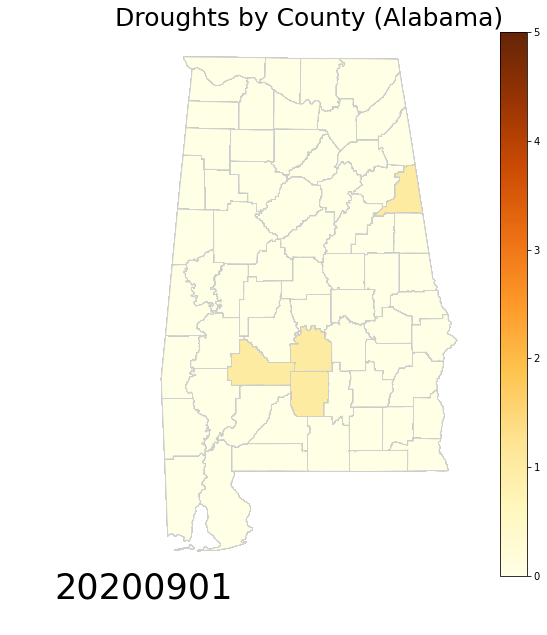

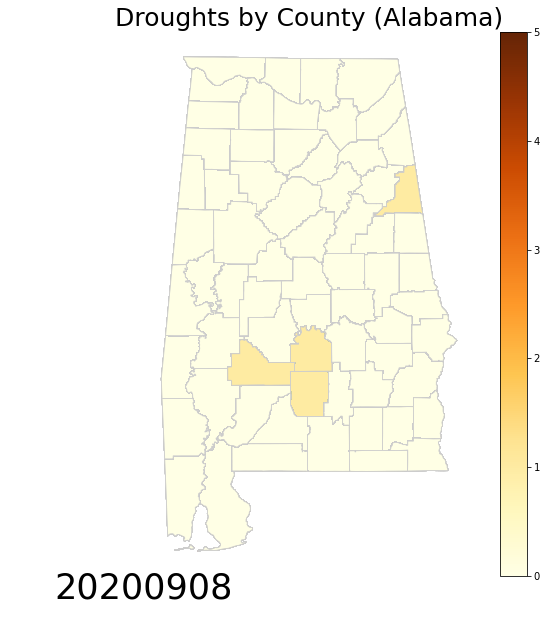

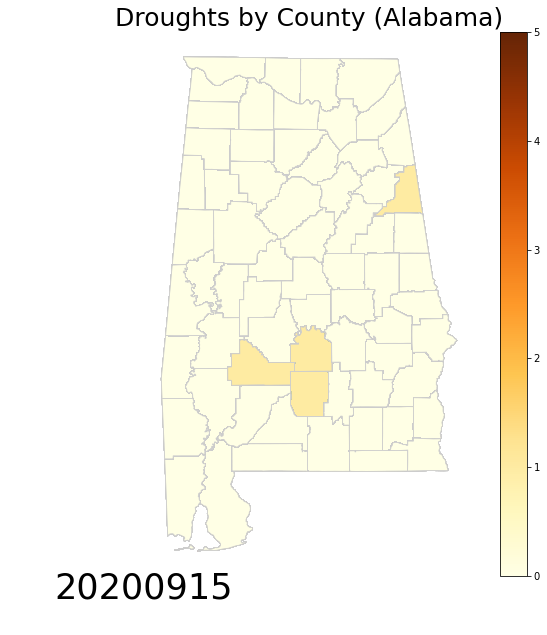

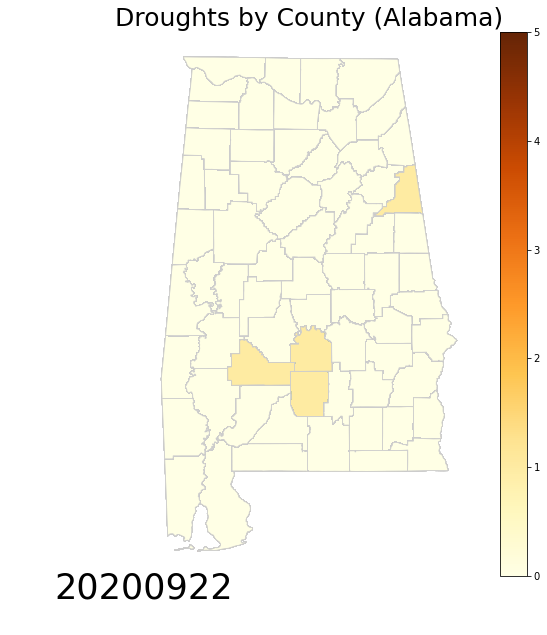

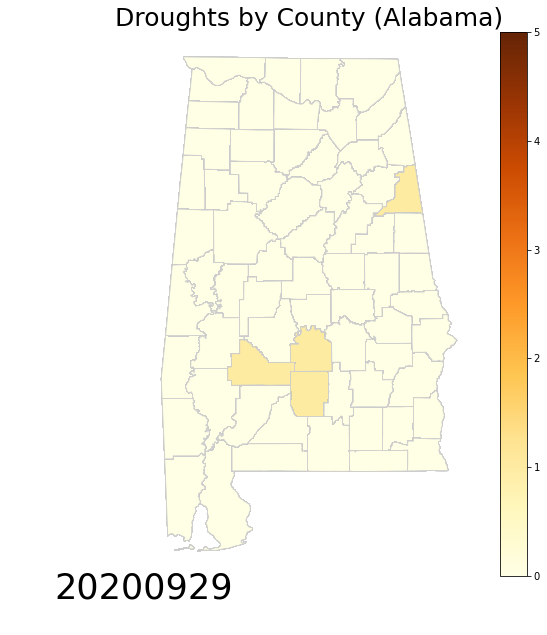

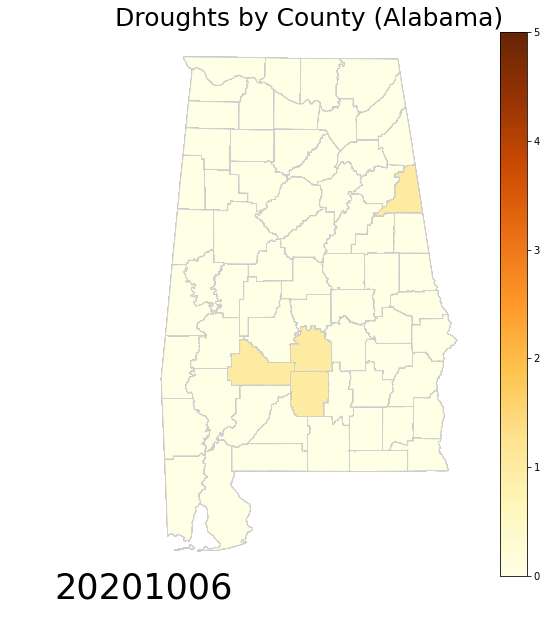

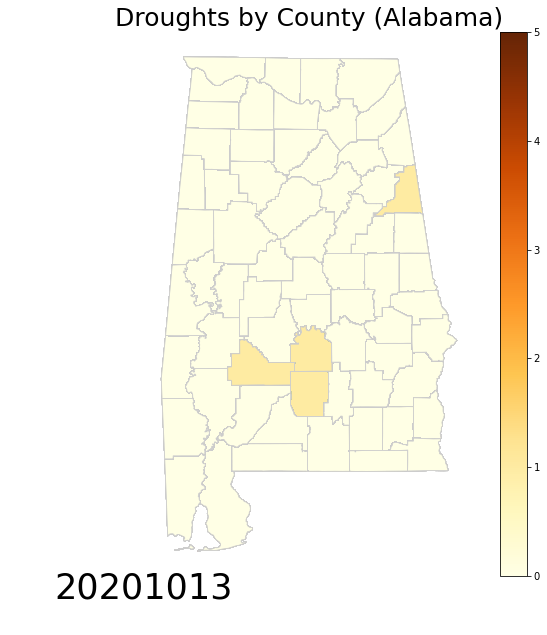

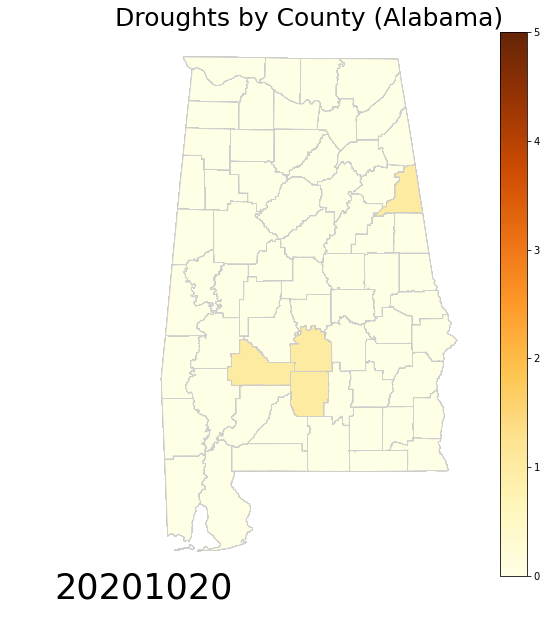

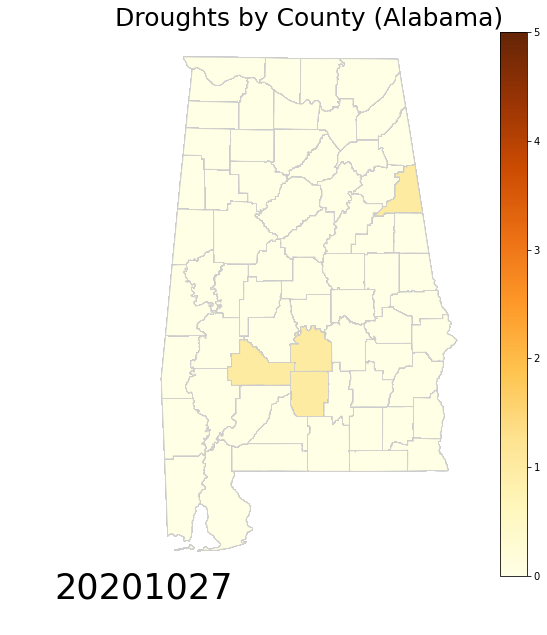

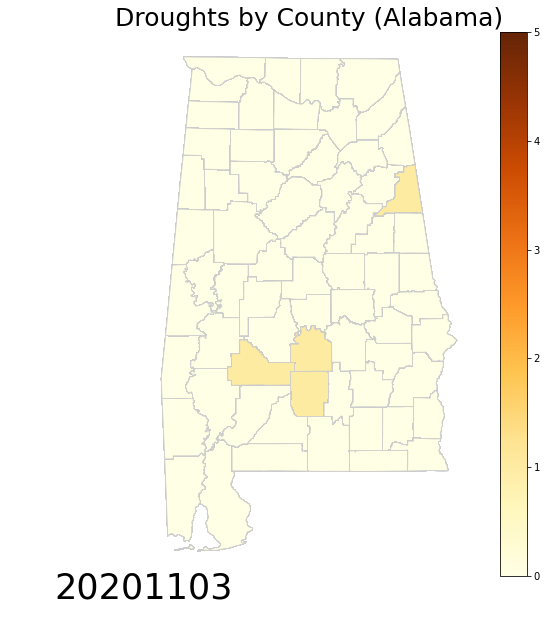

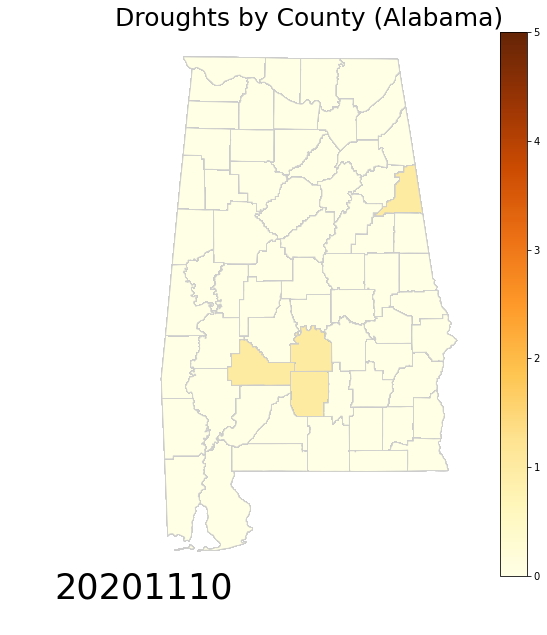

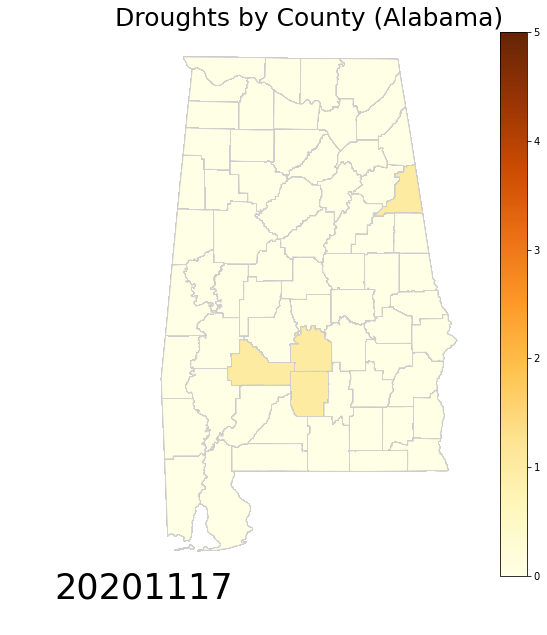

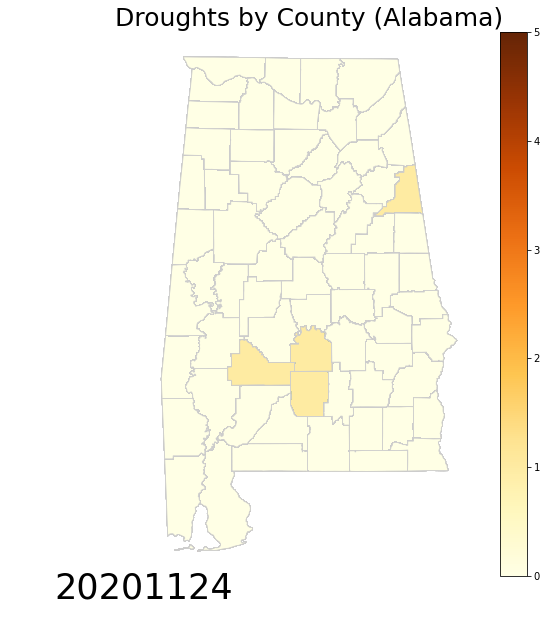

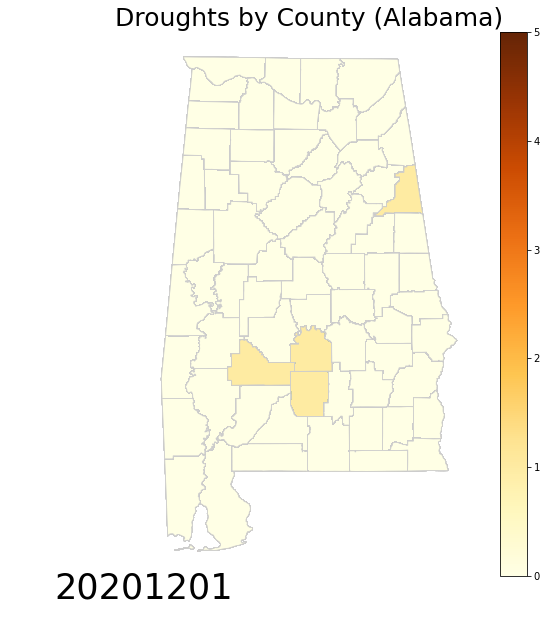

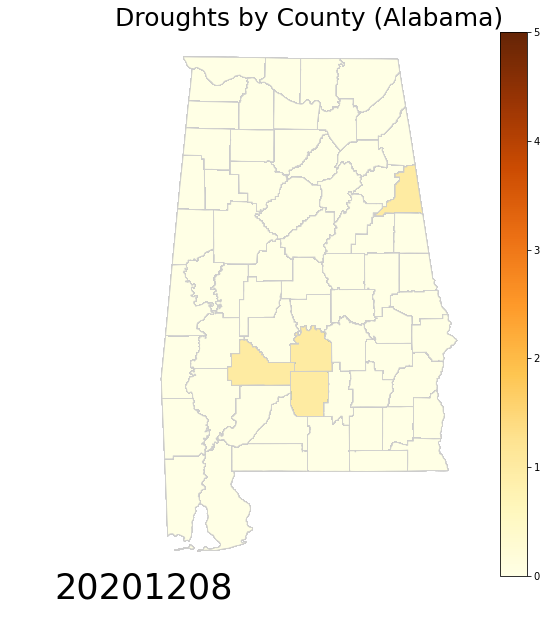

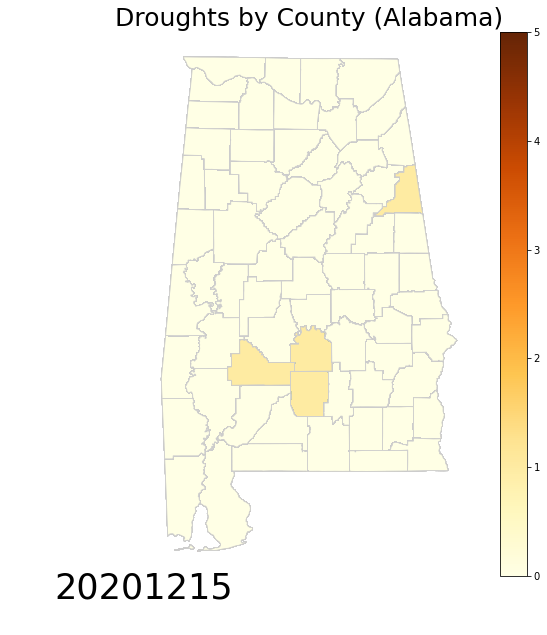

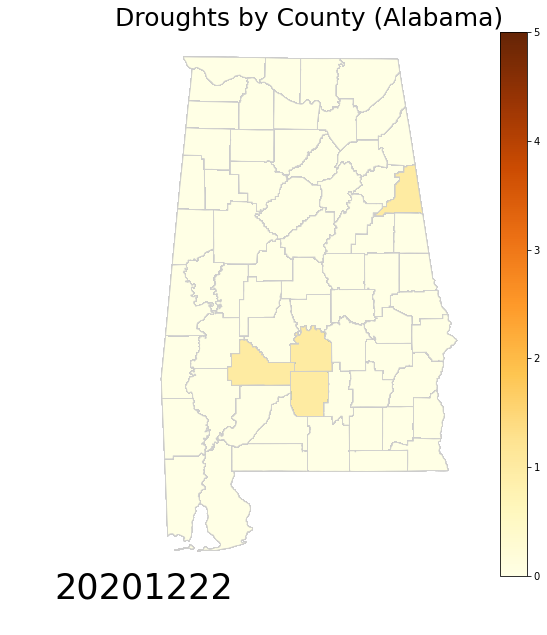

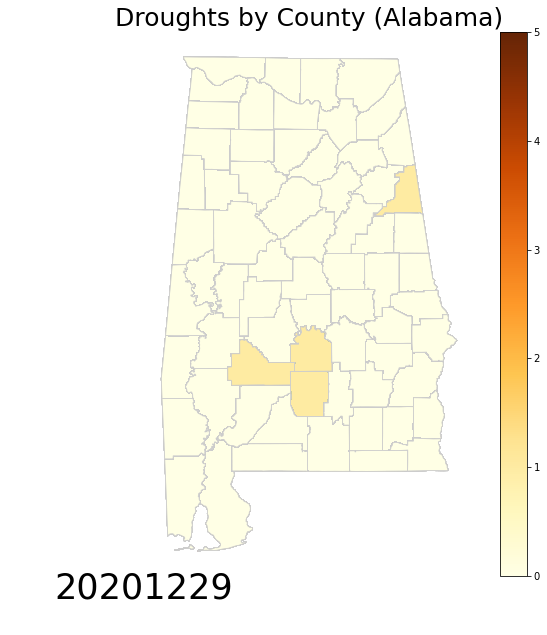

In [ ]:
# start the for loop to create one map per week
for date in list_of_days[87:]:
    
    # create map, UDPATE: added plt.Normalize to keep the legend range the same for all maps
    fig = maptest.plot(column=variable, cmap='YlOrBr', figsize=(10,10), linewidth=0.8, edgecolor='0.8', vmin=vmin, vmax=vmax,
legend=True, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    
    # remove axis of chart
    fig.axis('off')
    
    # add a title
    fig.set_title('Droughts by County (Alabama)', \
              fontdict={'fontsize': '25',
                         'fontweight' : '3'})
    
    only_day = date    # position the annotation to the bottom left
    fig.annotate(only_day,
            xy=(0.1, .1), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=35)
    
    # this will save the figure as a high-res png in the output path. you can also save as svg if you prefer.
    filepath = os.path.join("/content/drive/MyDrive/Colab Notebooks/Project/weekImages", only_day+'_drought.jpg')
    chart = fig.get_figure()
    chart.savefig(filepath, dpi=300)

In [ ]:
#Univariate Analysis - Distribution of continuous variables
measures_column_list = ['PRECTOT','PS','QV2M','T2M','T2MDEW','T2MWET','T2M_MAX','T2M_MIN','T2M_RANGE','TS','WS10M','WS10M_MAX','WS10M_MIN','WS10M_RANGE','WS50M','WS50M_MAX','WS50M_MIN','WS50M_RANGE']
drought_df_measures = drought_df[['PRECTOT','PS','QV2M','T2M','T2MDEW','T2MWET','T2M_MAX','T2M_MIN','T2M_RANGE','TS','WS10M','WS10M_MAX','WS10M_MIN','WS10M_RANGE','WS50M','WS50M_MAX','WS50M_MIN','WS50M_RANGE']]

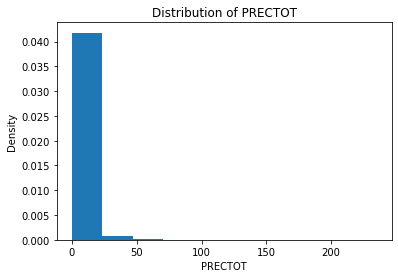

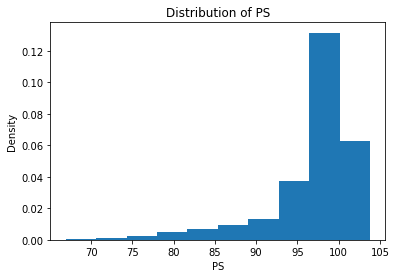

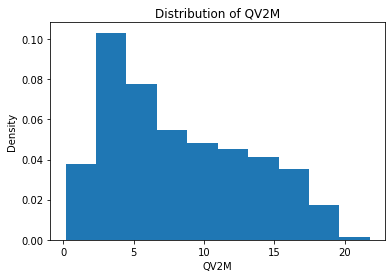

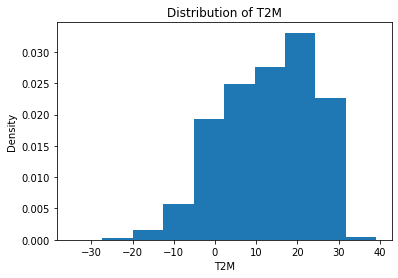

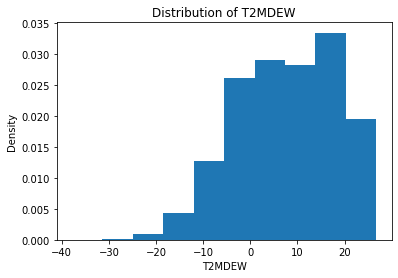

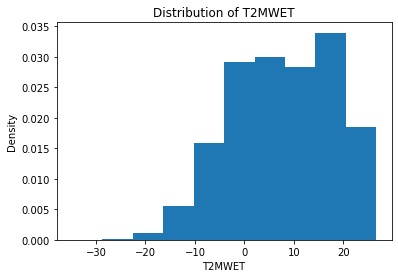

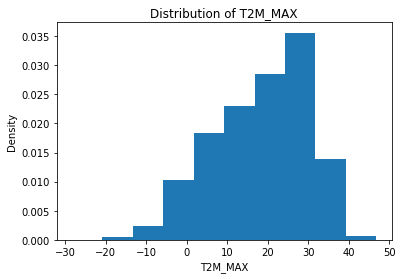

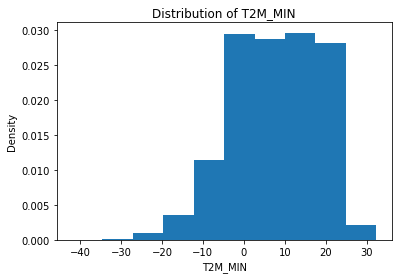

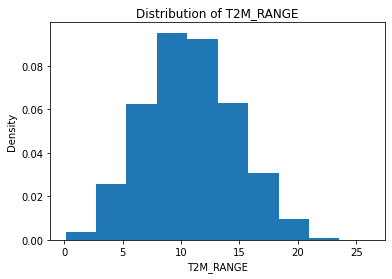

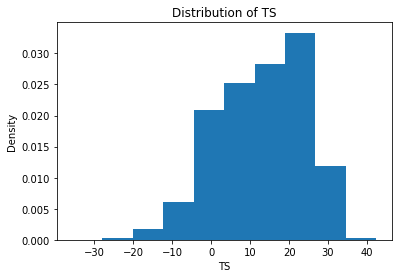

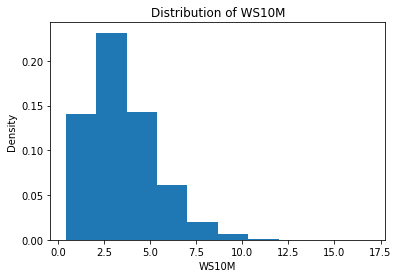

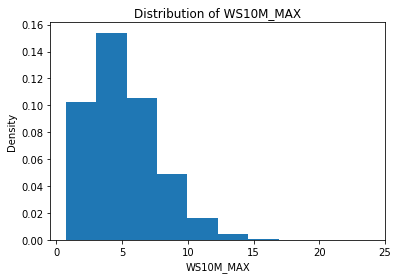

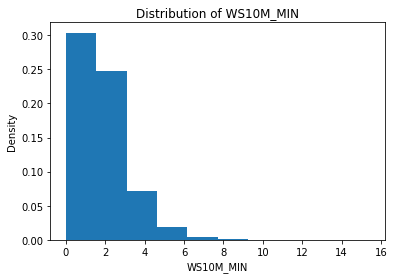

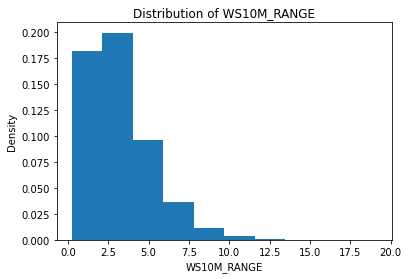

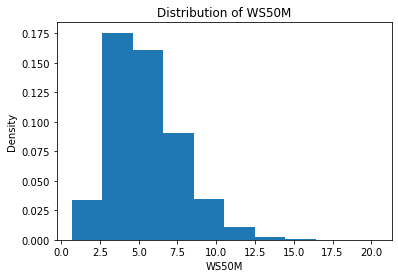

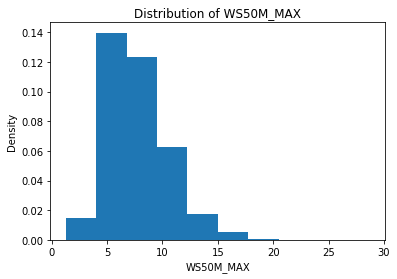

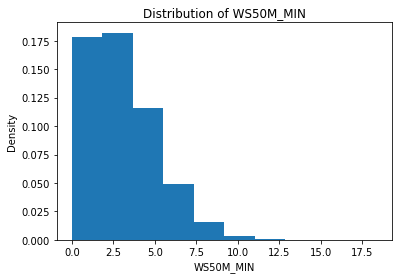

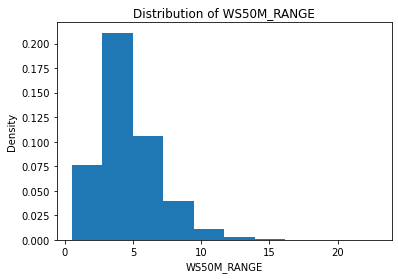

In [ ]:
for col_name in measures_column_list:
    plt.figure()
    plt.hist(drought_df_measures[col_name], density = True)
    x_name = col_name
    plt.xlabel(x_name)
    y_name = 'Density'
    plt.ylabel(y_name)
    plt.title('Distribution of {x_name}'.format(x_name=x_name))

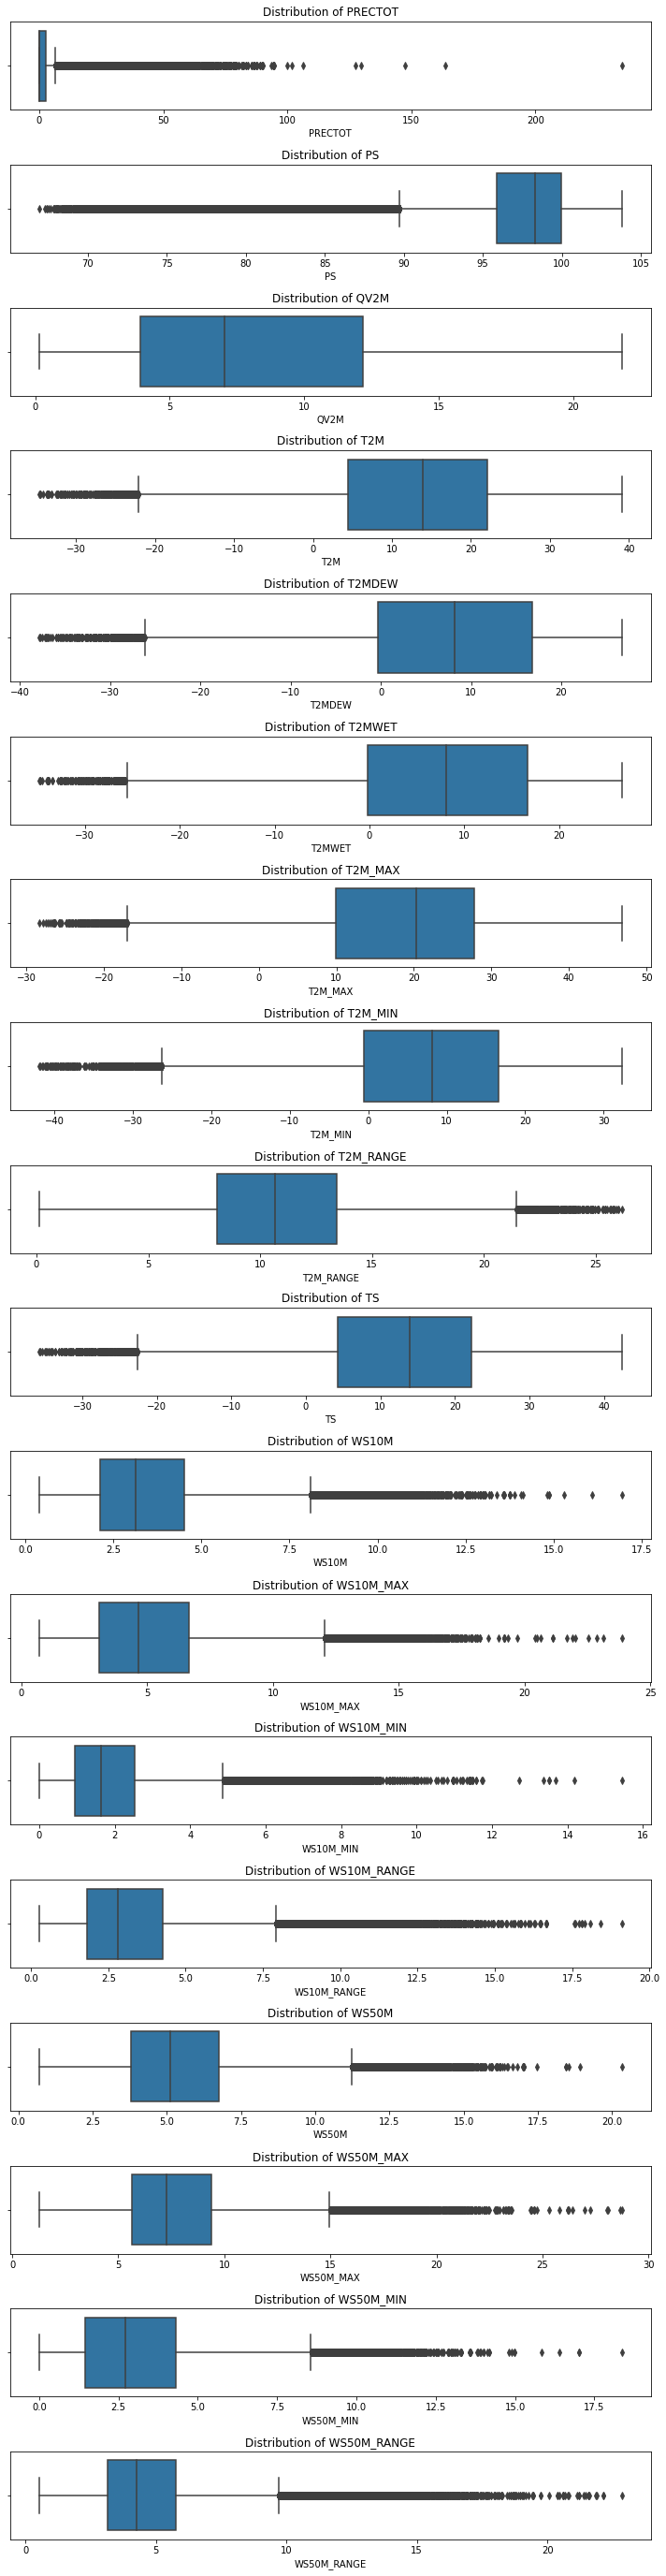

In [ ]:
#for outliers
plt.figure(figsize=(10,40))
for x in (range(1,19)):
    plt.subplot(19,1,x)
    sns.boxplot(x =  drought_df_measures.columns[x-1], data=drought_df_measures)
    x_name = drought_df_measures.columns[x-1]
    plt.title(f'Distribution of {x_name}')         
plt.tight_layout()

In [ ]:
print('Total rows = ',len(drought_df_measures.index))
for i in drought_df_measures.select_dtypes(exclude = ['object']).columns:
    print ('Number of values beyong standard outlier limit in ', i)
    print(len(drought_df_measures[(drought_df_measures[i] > drought_df_measures[i].mean() + 3*drought_df_measures[i].std()) | (drought_df_measures[i] < drought_df_measures[i].mean() - 3*drought_df_measures[i].std())]))

Total rows =  326340
Number of values beyong standard outlier limit in  PRECTOT
7489
Number of values beyong standard outlier limit in  PS
8693
Number of values beyong standard outlier limit in  QV2M
0
Number of values beyong standard outlier limit in  T2M
678
Number of values beyong standard outlier limit in  T2MDEW
628
Number of values beyong standard outlier limit in  T2MWET
420
Number of values beyong standard outlier limit in  T2M_MAX
604
Number of values beyong standard outlier limit in  T2M_MIN
965
Number of values beyong standard outlier limit in  T2M_RANGE
291
Number of values beyong standard outlier limit in  TS
675
Number of values beyong standard outlier limit in  WS10M
3663
Number of values beyong standard outlier limit in  WS10M_MAX
2737
Number of values beyong standard outlier limit in  WS10M_MIN
4620
Number of values beyong standard outlier limit in  WS10M_RANGE
4283
Number of values beyong standard outlier limit in  WS50M
2682
Number of values beyong standard outlier l

In [ ]:
#Removing values beyond the standard outlier limit
drought_df = drought_df[(drought_df['PRECTOT'] <= drought_df['PRECTOT'].mean() + 3*drought_df['PRECTOT'].std()) &
        (drought_df['PRECTOT'] >= drought_df['PRECTOT'].mean() - 3*drought_df['PRECTOT'].std())]

drought_df = drought_df[(drought_df['PS'] <= drought_df['PS'].mean() + 3*drought_df['PS'].std()) &
        (drought_df['PS'] >= drought_df['PS'].mean() - 3*drought_df['PS'].std())]

drought_df = drought_df[(drought_df['QV2M'] <= drought_df['QV2M'].mean() + 3*drought_df['QV2M'].std()) &
        (drought_df['QV2M'] >= drought_df['QV2M'].mean() - 3*drought_df['QV2M'].std())]

drought_df = drought_df[(drought_df['T2M'] <= drought_df['T2M'].mean() + 3*drought_df['T2M'].std()) &
        (drought_df['T2M'] >= drought_df['T2M'].mean() - 3*drought_df['T2M'].std())]

drought_df = drought_df[(drought_df['T2MDEW'] <= drought_df['T2MDEW'].mean() + 3*drought_df['T2MDEW'].std()) &
        (drought_df['T2MDEW'] >= drought_df['T2MDEW'].mean() - 3*drought_df['T2MDEW'].std())]

drought_df = drought_df[(drought_df['T2MWET'] <= drought_df['T2MWET'].mean() + 3*drought_df['T2MWET'].std()) &
        (drought_df['T2MWET'] >= drought_df['T2MWET'].mean() - 3*drought_df['T2MWET'].std())]

drought_df = drought_df[(drought_df['T2M_MAX'] <= drought_df['T2M_MAX'].mean() + 3*drought_df['T2M_MAX'].std()) &
        (drought_df['T2M_MAX'] >= drought_df['T2M_MAX'].mean() - 3*drought_df['T2M_MAX'].std())]

drought_df = drought_df[(drought_df['T2M_MIN'] <= drought_df['T2M_MIN'].mean() + 3*drought_df['T2M_MIN'].std()) &
        (drought_df['T2M_MIN'] >= drought_df['T2M_MIN'].mean() - 3*drought_df['T2M_MIN'].std())]

drought_df = drought_df[(drought_df['T2M_RANGE'] <= drought_df['T2M_RANGE'].mean() + 3*drought_df['T2M_RANGE'].std()) &
        (drought_df['T2M_RANGE'] >= drought_df['T2M_RANGE'].mean() - 3*drought_df['T2M_RANGE'].std())]

drought_df = drought_df[(drought_df['TS'] <= drought_df['TS'].mean() + 3*drought_df['TS'].std()) &
        (drought_df['TS'] >= drought_df['TS'].mean() - 3*drought_df['TS'].std())]

drought_df = drought_df[(drought_df['WS10M'] <= drought_df['WS10M'].mean() + 3*drought_df['WS10M'].std()) &
        (drought_df['WS10M'] >= drought_df['WS10M'].mean() - 3*drought_df['WS10M'].std())]

drought_df = drought_df[(drought_df['WS10M_MAX'] <= drought_df['WS10M_MAX'].mean() + 3*drought_df['WS10M_MAX'].std()) &
        (drought_df['WS10M_MAX'] >= drought_df['WS10M_MAX'].mean() - 3*drought_df['WS10M_MAX'].std())]

drought_df = drought_df[(drought_df['WS10M_MIN'] <= drought_df['WS10M_MIN'].mean() + 3*drought_df['WS10M_MIN'].std()) &
        (drought_df['WS10M_MIN'] >= drought_df['WS10M_MIN'].mean() - 3*drought_df['WS10M_MIN'].std())]

drought_df = drought_df[(drought_df['WS10M_RANGE'] <= drought_df['WS10M_RANGE'].mean() + 3*drought_df['WS10M_RANGE'].std()) &
        (drought_df['WS10M_RANGE'] >= drought_df['WS10M_RANGE'].mean() - 3*drought_df['WS10M_RANGE'].std())]

drought_df = drought_df[(drought_df['WS50M'] <= drought_df['WS50M'].mean() + 3*drought_df['WS50M'].std()) &
        (drought_df['WS50M'] >= drought_df['WS50M'].mean() - 3*drought_df['WS50M'].std())]

drought_df = drought_df[(drought_df['WS50M_MAX'] <= drought_df['WS50M_MAX'].mean() + 3*drought_df['WS50M_MAX'].std()) &
        (drought_df['WS50M_MAX'] >= drought_df['WS50M_MAX'].mean() - 3*drought_df['WS50M_MAX'].std())]

drought_df = drought_df[(drought_df['WS50M_MIN'] <= drought_df['WS50M_MIN'].mean() + 3*drought_df['WS50M_MIN'].std()) &
        (drought_df['WS50M_MIN'] >= drought_df['WS50M_MIN'].mean() - 3*drought_df['WS50M_MIN'].std())]

drought_df = drought_df[(drought_df['WS50M_RANGE'] <= drought_df['WS50M_RANGE'].mean() + 3*drought_df['WS50M_RANGE'].std()) &
        (drought_df['WS50M_RANGE'] >= drought_df['WS50M_RANGE'].mean() - 3*drought_df['WS50M_RANGE'].std())]

print('Total rows = ',len(drought_df.index))

Total rows =  292895


In [ ]:
#Removing values beyond the standard outlier limit
categorical_column_list = ['score','year','month','day']
drought_df_categorical = drought_df[['score','year','month','day']]

<Figure size 720x2880 with 0 Axes>

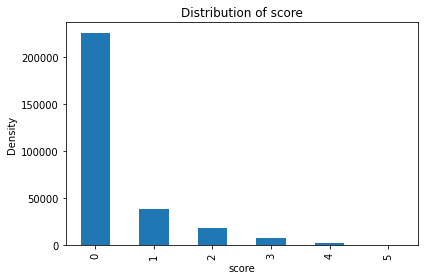

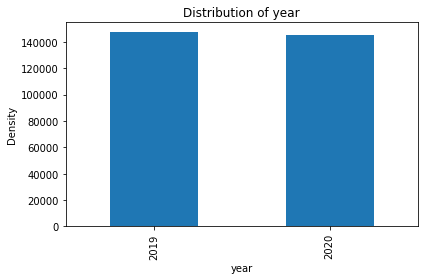

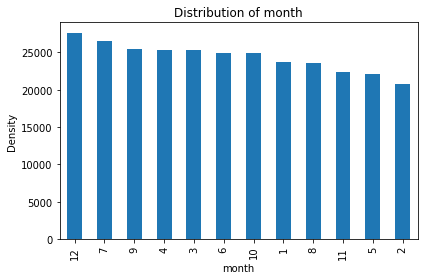

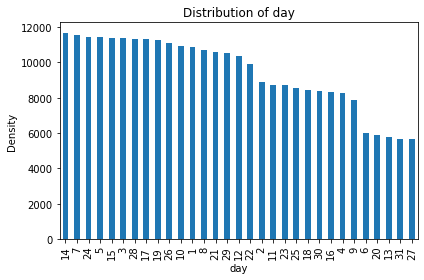

In [ ]:
# Distribution of categorical variables
plt.figure(figsize=(10,40))
for col_name in categorical_column_list:
    plt.figure()
    drought_df_categorical[col_name].value_counts().plot(kind = 'bar')
    x_name = col_name
    y_name = 'Density'
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.title('Distribution of {x_name}'.format(x_name=x_name))
    plt.tight_layout()

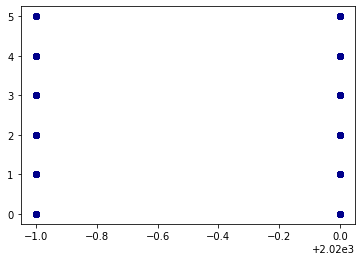

In [ ]:
#Bivariate Analysis
plt.scatter(drought_df['year'], drought_df['score'], c ="darkblue")
plt.show()

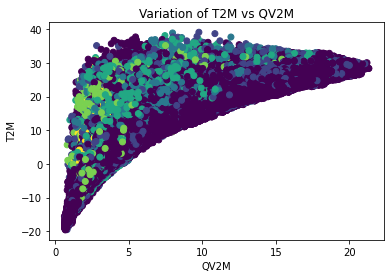

In [ ]:
plt.scatter(drought_df['QV2M'], drought_df['T2M'], c =drought_df['score'])
plt.xlabel('QV2M')
plt.ylabel('T2M')
plt.title('Variation of T2M vs QV2M')
plt.show()

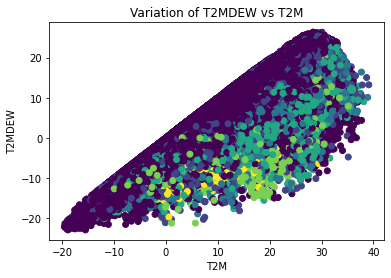

In [ ]:
plt.scatter(drought_df['T2M'], drought_df['T2MDEW'], c =drought_df['score'])
plt.xlabel('T2M')
plt.ylabel('T2MDEW')
plt.title('Variation of T2MDEW vs T2M')
plt.show()

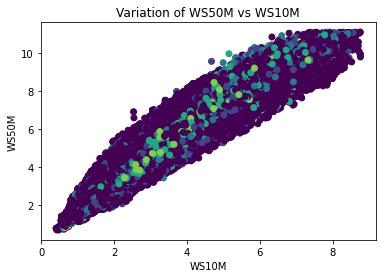

In [ ]:
temp_df = drought_df[drought_df['score']==5]
plt.scatter(drought_df['WS10M'], drought_df['WS50M'], c= drought_df['score'])
plt.xlabel('WS10M')
plt.ylabel('WS50M')
plt.title('Variation of WS50M vs WS10M')
plt.show()

In [ ]:
#Extracting Dependent and Independent Variables
independent_variables = drought_df.drop('score', 1)
independent_variables = independent_variables.drop('fips', 1)
independent_variables = independent_variables.drop('date', 1)
independent_variables.head()

,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,...,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,year,month,day
0,2.25,100.51,9.69,14.71,13.55,13.52,17.38,10.92,6.46,14.63,...,1.50,0.79,0.71,2.74,4.01,1.23,2.78,2019,1,1
7,0.05,100.57,8.75,13.15,12.01,11.98,20.04,9.36,10.68,13.05,...,3.40,1.68,1.72,5.13,6.51,3.67,2.85,2019,1,8
14,0.00,101.07,4.04,3.91,0.94,0.96,9.40,1.02,8.38,3.91,...,2.40,1.36,1.04,3.28,4.13,2.39,1.75,2019,1,15
21,0.03,101.14,4.96,6.03,3.81,3.08,12.43,-1.63,14.06,6.08,...,4.57,2.49,2.07,6.65,8.56,5.01,3.55,2019,1,22
28,5.79,100.36,3.69,2.23,-0.41,-1.03,7.33,-5.19,12.52,2.18,...,4.52,1.71,2.81,5.62,6.96,3.60,3.35,2019,1,29


In [ ]:
target = drought_df['score']
target.head()

0     0
7     0
14    0
21    0
28    0
Name: score, dtype: int64

In [ ]:
pip install Jinja2

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#Correlation between independent variables for Feature Selection
correlation_plot = drought_df_measures.corr()
correlation_plot.style.background_gradient(cmap = 'RdYlGn')

,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE
PRECTOT,1.000000,0.073904,0.225188,0.096873,0.216142,0.214408,0.038072,0.140574,-0.279291,0.095679,0.060851,0.071811,0.032583,0.072911,0.068972,0.073980,0.061379,0.036513
PS,0.073904,1.000000,0.291043,0.176514,0.358778,0.359810,0.119935,0.223182,-0.263869,0.176525,-0.085867,-0.136817,0.024800,-0.196161,-0.044718,-0.090659,0.038125,-0.150822
QV2M,0.225188,0.291043,1.000000,0.883240,0.955312,0.959481,0.823517,0.911682,-0.071054,0.876741,-0.233731,-0.260642,-0.105144,-0.273266,-0.211670,-0.251765,-0.080321,-0.244589
T2M,0.096873,0.176514,0.883240,1.000000,0.922757,0.922069,0.984454,0.983452,0.213421,0.997619,-0.245111,-0.252613,-0.146473,-0.235478,-0.226880,-0.235551,-0.135565,-0.172296
T2MDEW,0.216142,0.358778,0.955312,0.922757,1.000000,0.998329,0.870069,0.941936,-0.015390,0.915961,-0.254511,-0.280128,-0.118626,-0.289993,-0.215461,-0.251430,-0.088088,-0.236895
T2MWET,0.214408,0.359810,0.959481,0.922069,0.998329,1.000000,0.868723,0.943168,-0.022908,0.914939,-0.255874,-0.281876,-0.118760,-0.292202,-0.217338,-0.253734,-0.088828,-0.239129
T2M_MAX,0.038072,0.119935,0.823517,0.984454,0.870069,0.868723,1.000000,0.943626,0.372018,0.981060,-0.260442,-0.261355,-0.167708,-0.232972,-0.235435,-0.232587,-0.160173,-0.145500
T2M_MIN,0.140574,0.223182,0.911682,0.983452,0.941936,0.943168,0.943626,1.000000,0.043793,0.981389,-0.240578,-0.253921,-0.131791,-0.246872,-0.228760,-0.249764,-0.118401,-0.206411
T2M_RANGE,-0.279291,-0.263869,-0.071054,0.213421,-0.015390,-0.022908,0.372018,0.043793,1.000000,0.208961,-0.111422,-0.076762,-0.136600,-0.010862,-0.069088,-0.001590,-0.151410,0.139681
TS,0.095679,0.176525,0.876741,0.997619,0.915961,0.914939,0.981060,0.981389,0.208961,1.000000,-0.229252,-0.237360,-0.133530,-0.223961,-0.216977,-0.224977,-0.127575,-0.166343


#### <font color='darkgreen'>Attributes QV2M,	T2M,	T2MDEW,	T2MWET,	T2M_MAX,	T2M_MIN and TS have shown strong positive correlation

#### <font color='darkgreen'>Similary WS10M,	WS10M_MAX and	WS10M_MIN have shown a strong positve correlation

#### <font color='darkgreen'>Likewise, WS50M,	WS50M_MAX and	WS50M_MIN	show strong positive correlation

#### <font color='darkgreen'>However, from the scatter plots above, we see significant variance between the data points, despite the strong positive correlation. Hence we'll retain all these variables, and try other feature selection methods.

In [ ]:
#create train and test sets
X_train, X_test, y_train, y_test = train_test_split(independent_variables, target, test_size=0.2, random_state=0)

In [ ]:
print("Train features shape", X_train.shape)
print("Train target shape", y_train.shape)
print("Test features shape", X_test.shape)
print("Test target shape", y_test.shape)

Train features shape (234316, 21)
Train target shape (234316,)
Test features shape (58579, 21)
Test target shape (58579,)


In [ ]:
#Standardizing the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[-0.53217154,  0.35960201,  0.70283787, ..., -0.99218642,
        -0.75527926,  1.61448675],
       [ 0.48114484,  0.18459972,  1.47146266, ...,  1.00787512,
         0.11598029,  1.38876007],
       [-0.52700156, -3.0091919 , -0.9638643 , ..., -0.99218642,
        -1.04569911,  0.37299003],
       ...,
       [ 0.83270358,  0.06946664, -0.54516606, ..., -0.99218642,
         0.98723984, -1.65855006],
       [-0.53217154, -0.61212119, -1.43919806, ..., -0.99218642,
        -1.04569911, -1.2070967 ],
       [-0.07204319,  0.17078375,  1.4431449 , ...,  1.00787512,
         0.11598029, -0.98137003]])

In [ ]:
model = RandomForestClassifier(n_estimators=10) # n_estimators is the hyperparameter
rfe = RFE(model, n_features_to_select=15) # n_features_to_select is chosen on a trial and error basis
fit = rfe.fit(X_train, y_train)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))
selected_features = independent_variables.columns[(fit.get_support())]
print(selected_features)

Num Features: 15
Selected Features: [False  True  True  True  True  True  True  True  True  True False  True
 False  True  True  True False False False  True  True]
Feature Ranking: [4 1 1 1 1 1 1 1 1 1 3 1 5 1 1 1 6 2 7 1 1]
Index(['PS', 'QV2M', 'T2M', 'T2MDEW', 'T2MWET', 'T2M_MAX', 'T2M_MIN',
       'T2M_RANGE', 'TS', 'WS10M_MAX', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX',
       'month', 'day'],
      dtype='object')


In [ ]:
independent_variables = independent_variables.drop('PRECTOT', 1)
independent_variables = independent_variables.drop('T2MWET', 1)
independent_variables = independent_variables.drop('WS10M_MAX', 1)
independent_variables = independent_variables.drop('WS10M_MIN', 1)
independent_variables = independent_variables.drop('WS50M_MIN', 1)
independent_variables = independent_variables.drop('month', 1)
independent_variables.head()

X_train, X_test, y_train, y_test = train_test_split(independent_variables, target, test_size=0.2, random_state=0)

print("Train features shape", X_train.shape)
print("Train target shape", y_train.shape)
print("Test features shape", X_test.shape)
print("Test target shape", y_test.shape)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Train features shape (234316, 15)
Train target shape (234316,)
Test features shape (58579, 15)
Test target shape (58579,)


In [ ]:
#resolving the class imbalance with upsampling
sm = SMOTE(random_state = 5)
X_train_ures_SMOTE, y_train_ures_SMOTE = sm.fit_resample(X_train, y_train.ravel())

In [ ]:
print('Before OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('Before OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

print('After OverSampling, the shape of train_X: {}'.format(X_train_ures_SMOTE.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_ures_SMOTE.shape))

print("Counts of label '0' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 0),sum(y_train_ures_SMOTE == 0)))
print("Counts of label '1' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 1),sum(y_train_ures_SMOTE == 1)))
print("Counts of label '2' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 2),sum(y_train_ures_SMOTE == 2)))
print("Counts of label '3' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 3),sum(y_train_ures_SMOTE == 3)))
print("Counts of label '4' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 4),sum(y_train_ures_SMOTE == 4)))
print("Counts of label '5' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 5),sum(y_train_ures_SMOTE == 5)))

Before OverSampling, the shape of train_X: (234316, 15)
Before OverSampling, the shape of train_y: (234316,) 

After OverSampling, the shape of train_X: (1081386, 15)
After OverSampling, the shape of train_y: (1081386,) 

Counts of label '0' - Before Oversampling:180231, After OverSampling: 180231
Counts of label '1' - Before Oversampling:30494, After OverSampling: 180231
Counts of label '2' - Before Oversampling:15090, After OverSampling: 180231
Counts of label '3' - Before Oversampling:6228, After OverSampling: 180231
Counts of label '4' - Before Oversampling:1908, After OverSampling: 180231
Counts of label '5' - Before Oversampling:365, After OverSampling: 180231


In [ ]:
#Downsampling
undersample = NeighbourhoodCleaningRule(n_neighbors=3, threshold_cleaning=0.5)
X_train_dres, y_train_dres = undersample.fit_resample(X_train, y_train)

In [ ]:
print('Before UnderSampling, the shape of train_X: {}'.format(X_train.shape))
print('Before UnderSampling, the shape of train_y: {} \n'.format(y_train.shape))

print('After UnderSampling, the shape of train_X: {}'.format(X_train_dres.shape))
print('After UnderSampling, the shape of train_y: {} \n'.format(y_train_dres.shape))

print("Counts of label '0' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 0),sum(y_train_dres == 0)))
print("Counts of label '1' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 1),sum(y_train_dres == 1)))
print("Counts of label '2' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 2),sum(y_train_dres == 2)))
print("Counts of label '3' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 3),sum(y_train_dres == 3)))
print("Counts of label '4' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 4),sum(y_train_dres == 4)))
print("Counts of label '5' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 5),sum(y_train_dres == 5)))

Before UnderSampling, the shape of train_X: (234316, 15)
Before UnderSampling, the shape of train_y: (234316,) 

After UnderSampling, the shape of train_X: (198337, 15)
After UnderSampling, the shape of train_y: (198337,) 

Counts of label '0' - Before UnderSampling:180231, After UnderSampling: 172443
Counts of label '1' - Before UnderSampling:30494, After UnderSampling: 16100
Counts of label '2' - Before UnderSampling:15090, After UnderSampling: 6686
Counts of label '3' - Before UnderSampling:6228, After UnderSampling: 2184
Counts of label '4' - Before UnderSampling:1908, After UnderSampling: 559
Counts of label '5' - Before UnderSampling:365, After UnderSampling: 365


In [ ]:
#downsampling
undersample = NearMiss()
X_train_dres_nm, y_train_dres_nm = undersample.fit_resample(X_train, y_train)

In [ ]:
print('Before UnderSampling, the shape of train_X: {}'.format(X_train.shape))
print('Before UnderSampling, the shape of train_y: {} \n'.format(y_train.shape))

print('After UnderSampling, the shape of train_X: {}'.format(X_train_dres_nm.shape))
print('After UnderSampling, the shape of train_y: {} \n'.format(y_train_dres_nm.shape))

print("Counts of label '0' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 0),sum(y_train_dres_nm == 0)))
print("Counts of label '1' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 1),sum(y_train_dres_nm == 1)))
print("Counts of label '2' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 2),sum(y_train_dres_nm == 2)))
print("Counts of label '3' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 3),sum(y_train_dres_nm == 3)))
print("Counts of label '4' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 4),sum(y_train_dres_nm == 4)))
print("Counts of label '5' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 5),sum(y_train_dres_nm == 5)))

Before UnderSampling, the shape of train_X: (234316, 15)
Before UnderSampling, the shape of train_y: (234316,) 

After UnderSampling, the shape of train_X: (2190, 15)
After UnderSampling, the shape of train_y: (2190,) 

Counts of label '0' - Before UnderSampling:180231, After UnderSampling: 365
Counts of label '1' - Before UnderSampling:30494, After UnderSampling: 365
Counts of label '2' - Before UnderSampling:15090, After UnderSampling: 365
Counts of label '3' - Before UnderSampling:6228, After UnderSampling: 365
Counts of label '4' - Before UnderSampling:1908, After UnderSampling: 365
Counts of label '5' - Before UnderSampling:365, After UnderSampling: 365


In [ ]:
pca = PCA()
X_train_dres_nm_PCAreduced = pca.fit_transform(X_train_dres_nm)
X_test_NM_PCA_transformed = pca.transform(X_test)

In [ ]:
print(pca.explained_variance_ratio_)

[4.87287941e-01 2.54479011e-01 9.10912712e-02 5.53957443e-02
 4.53616156e-02 3.28909804e-02 1.68887747e-02 1.07633366e-02
 2.55123456e-03 1.49483210e-03 7.97275924e-04 6.55586371e-04
 2.34603112e-04 1.07783600e-04 8.99763873e-09]


In [ ]:
# choosing n value that explains >90% variance
pca = PCA(n_components=5)
X_train_dres_nm_PCAreduced = pca.fit_transform(X_train_dres_nm)
X_test_NM_PCA_transformed = pca.transform(X_test)

In [ ]:
print(pca.explained_variance_ratio_)

[0.48728794 0.25447901 0.09109127 0.05539574 0.04536162]


In [ ]:
pca = PCA()
X_train_ures_SMOTE_PCAreduced = pca.fit_transform(X_train_ures_SMOTE)
X_test_SMOTE_PCA_transformed = pca.transform(X_test)

In [ ]:
print(pca.explained_variance_ratio_)

[3.93937609e-01 2.29516688e-01 1.42689068e-01 6.57793386e-02
 5.57021616e-02 4.69382031e-02 4.08215971e-02 1.11975944e-02
 8.27794488e-03 1.96691414e-03 1.63643101e-03 1.05583991e-03
 4.09367454e-04 7.12383543e-05 4.67648941e-09]


In [ ]:
# choosing n value that explains >90% variance
pca = PCA(n_components=5)
X_train_ures_SMOTE_PCAreduced = pca.fit_transform(X_train_ures_SMOTE)
X_test_SMOTE_PCA_transformed = pca.transform(X_test)

In [ ]:
print(pca.explained_variance_ratio_)

[0.39393761 0.22951669 0.14268907 0.06577934 0.05570216]


In [ ]:
#modeling wiuth decision tree Algor
DT_classifier_NM = tree.DecisionTreeClassifier(criterion='gini')
DT_classifier_NM.fit(X_train_dres_nm,y_train_dres_nm)
y_pred_NM = DT_classifier_NM.predict(X_test)

In [ ]:
pickle.dump(DT_classifier_NM, open('DT_classifier_NM.pkl', 'wb'))

In [ ]:
print('Performance of Decision Tree Algorithm with Near Miss Downsampling:\n')
print(confusion_matrix(y_test, y_pred_NM))
print(classification_report(y_test, y_pred_NM))
print('Accuracy:',accuracy_score(y_test, y_pred_NM))
print('Precision:',precision_score(y_test, y_pred_NM, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_NM, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_NM, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_NM))

Performance of Decision Tree Algorithm with Near Miss Downsampling:

[[ 2366 11107  9755  4734  2410 14508]
 [  491  1785  1539   720   277  2902]
 [  313   895   779   463   198  1211]
 [  128   348   313   243   112   421]
 [   52    80    76   115    79    79]
 [    5     4     7     7    24    33]]
              precision    recall  f1-score   support

           0       0.71      0.05      0.10     44880
           1       0.13      0.23      0.16      7714
           2       0.06      0.20      0.10      3859
           3       0.04      0.16      0.06      1565
           4       0.03      0.16      0.04       481
           5       0.00      0.41      0.00        80

    accuracy                           0.09     58579
   macro avg       0.16      0.20      0.08     58579
weighted avg       0.56      0.09      0.10     58579

Accuracy: 0.09022004472592568
Precision: 0.5621896692154057
Recall: 0.09022004472592568
F1 Score: 0.10490288560875277
Cohen Kappa Score: -0.0037425613496

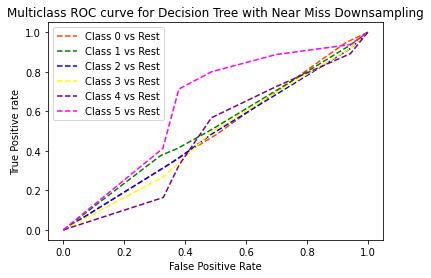

In [ ]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(6):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_NM, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Decision Tree with Near Miss Downsampling')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Decision Tree with Near Miss Downsampling',dpi=300)

In [ ]:
#Decision Tree Algorithm with Near Miss Downsampling - Hyperparameter Tuning
params = {
          'max_depth': [3, 5, 10, 20],
          'min_samples_leaf': [10, 20, 50, 100],
          'max_features':['log2','sqrt',None]
}

In [ ]:
grid_search_DT_NM = GridSearchCV(estimator=DT_classifier_NM, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [ ]:
%%time
grid_search_DT_NM.fit(X_train_dres_nm,y_train_dres_nm)

Fitting 4 folds for each of 48 candidates, totalling 192 fits
CPU times: user 160 ms, sys: 102 ms, total: 262 ms
Wall time: 1.34 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, 20],
                         'max_features': ['log2', 'sqrt', None],
                         'min_samples_leaf': [10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [ ]:
score_df = pd.DataFrame(grid_search_DT_NM.cv_results_)
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
33,0.009623,0.000866,0.000254,0.000015,10,None,20,"{'max_depth': 10, 'max_features': None, 'min_s...",0.304745,0.290146,0.299817,0.299817,0.298631,0.005296,1
32,0.010979,0.001071,0.000262,0.000013,10,None,10,"{'max_depth': 10, 'max_features': None, 'min_s...",0.270073,0.302920,0.310786,0.305302,0.297270,0.015959,2
45,0.011703,0.002875,0.000374,0.000184,20,None,20,"{'max_depth': 20, 'max_features': None, 'min_s...",0.304745,0.288321,0.296161,0.294333,0.295890,0.005878,3
44,0.013136,0.001790,0.000580,0.000281,20,None,10,"{'max_depth': 20, 'max_features': None, 'min_s...",0.259124,0.302920,0.310786,0.301645,0.293619,0.020221,4
36,0.004535,0.001295,0.000539,0.000195,20,log2,10,"{'max_depth': 20, 'max_features': 'log2', 'min...",0.251825,0.293796,0.321755,0.285192,0.288142,0.024947,5


In [ ]:
#Decision Tree Algorithm with SMOTE Upsampling
DT_classifier_SMOTE = tree.DecisionTreeClassifier(criterion='gini', max_depth=70)
DT_classifier_SMOTE.fit(X_train_ures_SMOTE,y_train_ures_SMOTE)
y_pred_SMOTE = DT_classifier_SMOTE.predict(X_test)

In [ ]:
pickle.dump(DT_classifier_SMOTE, open('DT_classifier_SMOTE.pkl', 'wb'))

In [ ]:
print('Performance of Decision Tree Algorithm with SMOTE Upsampling:\n')
print(confusion_matrix(y_test, y_pred_SMOTE))
print(classification_report(y_test, y_pred_SMOTE))
print('Accuracy:',accuracy_score(y_test, y_pred_SMOTE))
print('Precision:',precision_score(y_test, y_pred_SMOTE, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_SMOTE, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_SMOTE, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_SMOTE))

Performance of Decision Tree Algorithm with SMOTE Upsampling:

[[39720  3288  1183   512   160    17]
 [ 2034  4271  1031   275    90    13]
 [  400   995  1920   451    81    12]
 [  130   167   446   670   143     9]
 [   26    31    45   178   170    31]
 [    4     3     6    14    25    28]]
              precision    recall  f1-score   support

           0       0.94      0.89      0.91     44880
           1       0.49      0.55      0.52      7714
           2       0.41      0.50      0.45      3859
           3       0.32      0.43      0.37      1565
           4       0.25      0.35      0.30       481
           5       0.25      0.35      0.29        80

    accuracy                           0.80     58579
   macro avg       0.44      0.51      0.47     58579
weighted avg       0.82      0.80      0.81     58579

Accuracy: 0.7985626248314243
Precision: 0.8216884801889909
Recall: 0.7985626248314243
F1 Score: 0.8087084831965
Cohen Kappa Score: 0.5211158975144117


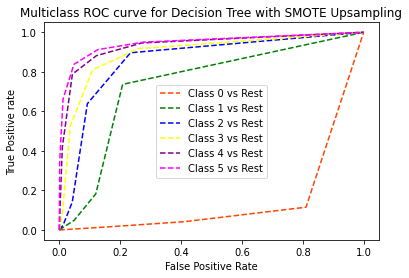

In [ ]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(6):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_SMOTE, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Decision Tree with SMOTE Upsampling')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Decision Tree with SMOTE Upsampling',dpi=300)

In [ ]:
#Decision Tree Algorithm with Near Miss Downsampling and PCA
DT_classifier_NM_PCA = tree.DecisionTreeClassifier(criterion='gini')
DT_classifier_NM_PCA.fit(X_train_dres_nm_PCAreduced,y_train_dres_nm)
y_pred_NM_PCA = DT_classifier_NM_PCA.predict(X_test_NM_PCA_transformed)

In [ ]:
pickle.dump(DT_classifier_NM_PCA, open('DT_classifier_NM_PCA.pkl', 'wb'))

In [ ]:
print('Performance of Decision Tree Algorithm with Near Miss Downsampling and PCA:\n')
print(confusion_matrix(y_test, y_pred_NM_PCA))
print(confusion_matrix(y_test, y_pred_NM_PCA))
print(classification_report(y_test, y_pred_NM_PCA))
print('Accuracy:',accuracy_score(y_test, y_pred_NM_PCA))
print('Precision:',precision_score(y_test, y_pred_NM_PCA, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_NM_PCA, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_NM_PCA, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_NM_PCA))

Performance of Decision Tree Algorithm with Near Miss Downsampling and PCA:

[[ 2181  7878 13907  3643  5208 12063]
 [  625  1307  2016   668   697  2401]
 [  372   617   971   365   450  1084]
 [  180   250   364   182   188   401]
 [   51    63    94    75    83   115]
 [    6     8     9     9    20    28]]
[[ 2181  7878 13907  3643  5208 12063]
 [  625  1307  2016   668   697  2401]
 [  372   617   971   365   450  1084]
 [  180   250   364   182   188   401]
 [   51    63    94    75    83   115]
 [    6     8     9     9    20    28]]
              precision    recall  f1-score   support

           0       0.64      0.05      0.09     44880
           1       0.13      0.17      0.15      7714
           2       0.06      0.25      0.09      3859
           3       0.04      0.12      0.06      1565
           4       0.01      0.17      0.02       481
           5       0.00      0.35      0.00        80

    accuracy                           0.08     58579
   macro avg       

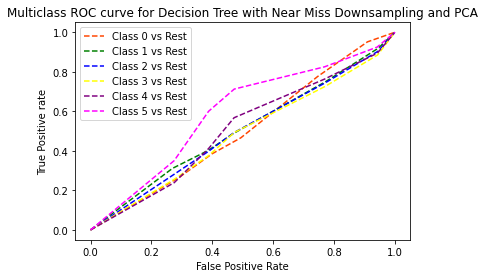

In [ ]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(6):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_NM_PCA, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Decision Tree with Near Miss Downsampling and PCA')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Decision Tree with Near Miss Downsampling and PCA',dpi=300)

In [ ]:
#Decision Tree Algorithm with SMOTE Upsampling and PCA
DT_classifier_SMOTE_PCA = tree.DecisionTreeClassifier(criterion='gini')
DT_classifier_SMOTE_PCA.fit(X_train_ures_SMOTE_PCAreduced,y_train_ures_SMOTE)
y_pred_SMOTE_PCA = DT_classifier_SMOTE_PCA.predict(X_test_SMOTE_PCA_transformed)

In [ ]:
pickle.dump(DT_classifier_SMOTE_PCA, open('DT_classifier_SMOTE_PCA.pkl', 'wb'))

In [ ]:
print('Performance of Decision Tree Algorithm with SMOTE Upsampling and PCA:\n')
print(confusion_matrix(y_test, y_pred_SMOTE_PCA))
print(confusion_matrix(y_test, y_pred_SMOTE_PCA))
print(classification_report(y_test, y_pred_SMOTE_PCA))
print('Accuracy:',accuracy_score(y_test, y_pred_SMOTE_PCA))
print('Precision:',precision_score(y_test, y_pred_SMOTE_PCA, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_SMOTE_PCA, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_SMOTE_PCA, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_SMOTE_PCA))

Performance of Decision Tree Algorithm with SMOTE Upsampling and PCA:

[[36835  4369  2029  1115   473    59]
 [ 2302  3786  1086   357   168    15]
 [  627   947  1696   448   120    21]
 [  249   194   423   540   141    18]
 [   68    49    56   129   152    27]
 [    9     6    10    12    20    23]]
[[36835  4369  2029  1115   473    59]
 [ 2302  3786  1086   357   168    15]
 [  627   947  1696   448   120    21]
 [  249   194   423   540   141    18]
 [   68    49    56   129   152    27]
 [    9     6    10    12    20    23]]
              precision    recall  f1-score   support

           0       0.92      0.82      0.87     44880
           1       0.40      0.49      0.44      7714
           2       0.32      0.44      0.37      3859
           3       0.21      0.35      0.26      1565
           4       0.14      0.32      0.20       481
           5       0.14      0.29      0.19        80

    accuracy                           0.73     58579
   macro avg       0.36  

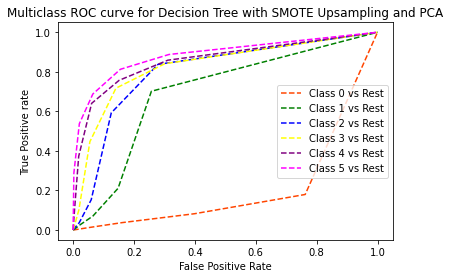

In [ ]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(6):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_SMOTE_PCA, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Decision Tree with SMOTE Upsampling and PCA')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Decision Tree with SMOTE Upsampling and PCA',dpi=300)

In [ ]:
#Decision Tree Algorithm without resampling
DT_classifier = tree.DecisionTreeClassifier(criterion='gini')
DT_classifier.fit(X_train,y_train)
y_pred_DT = DT_classifier.predict(X_test)

In [ ]:
print('Performance of Decision Tree Algorithm without resampling:\n')
print(confusion_matrix(y_test, y_pred_DT))
print(classification_report(y_test, y_pred_DT))
print('Accuracy:',accuracy_score(y_test, y_pred_DT))
print('Precision:',precision_score(y_test, y_pred_DT, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_DT, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_DT, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_DT))

Performance of Decision Tree Algorithm without resampling:

[[41486  2470   623   238    61     2]
 [ 2721  3848   887   203    51     4]
 [  668  1047  1724   357    55     8]
 [  267   195   430   550   117     6]
 [   63    54    59   125   155    25]
 [    6     3     8    12    25    26]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92     44880
           1       0.51      0.50      0.50      7714
           2       0.46      0.45      0.45      3859
           3       0.37      0.35      0.36      1565
           4       0.33      0.32      0.33       481
           5       0.37      0.33      0.34        80

    accuracy                           0.82     58579
   macro avg       0.49      0.48      0.49     58579
weighted avg       0.81      0.82      0.81     58579

Accuracy: 0.8158042984687345
Precision: 0.8131245738509815
Recall: 0.8158042984687345
F1 Score: 0.8144345689980954
Cohen Kappa Score: 0.5235868639033323


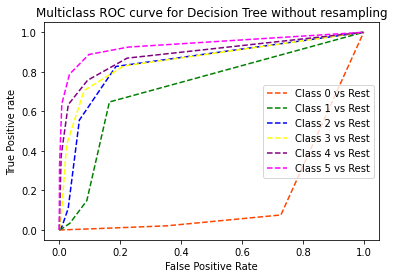

In [ ]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(6):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_DT, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Decision Tree without resampling')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Decision Tree without resampling',dpi=300)

In [ ]:
#Decision Tree Algorithm without resampling - Setting the right hyperparameters
DT_classifier = tree.DecisionTreeClassifier(criterion='gini', max_depth=70)
DT_classifier.fit(X_train,y_train)
y_pred_DT = DT_classifier.predict(X_test)

In [ ]:
print('Performance of Decision Tree Algorithm without resampling - After Hyperparameter Tuning:\n')
print(confusion_matrix(y_test, y_pred_DT))
print(classification_report(y_test, y_pred_DT))
print('Accuracy:',accuracy_score(y_test, y_pred_DT))
print('Precision:',precision_score(y_test, y_pred_DT, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_DT, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_DT, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_DT))

Performance of Decision Tree Algorithm without resampling - After Hyperparameter Tuning:

[[41448  2479   640   248    58     7]
 [ 2736  3838   888   190    58     4]
 [  660  1042  1731   357    61     8]
 [  261   197   409   569   119    10]
 [   64    52    64   119   151    31]
 [    6     5     6     6    27    30]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92     44880
           1       0.50      0.50      0.50      7714
           2       0.46      0.45      0.46      3859
           3       0.38      0.36      0.37      1565
           4       0.32      0.31      0.32       481
           5       0.33      0.38      0.35        80

    accuracy                           0.82     58579
   macro avg       0.49      0.49      0.49     58579
weighted avg       0.81      0.82      0.81     58579

Accuracy: 0.8154287372607931
Precision: 0.8131109723922546
Recall: 0.8154287372607931
F1 Score: 0.8142438235767834
Cohen Kappa Score

In [ ]:
pickle.dump(DT_classifier, open('DT_classifier.pkl', 'wb'))

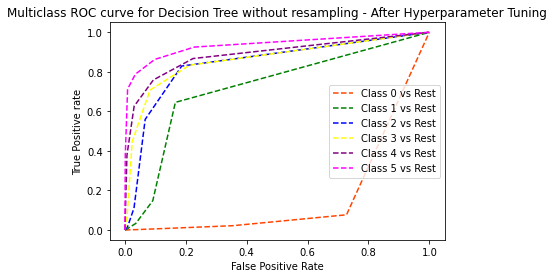

In [ ]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(6):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_DT, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Decision Tree without resampling - After Hyperparameter Tuning')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Decision Tree without resampling - After Hyperparameter Tuning',dpi=300)

In [ ]:
#KNN Algorithm without resampling
knn_classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)

In [ ]:
print('Performance of KNN Algorithm without resampling:\n')
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
print('Accuracy:',accuracy_score(y_test, y_pred_knn))
print('Precision:',precision_score(y_test, y_pred_knn, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_knn, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_knn, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_knn))

Performance of KNN Algorithm without resampling:

[[43060  1522   213    63    17     5]
 [ 3411  3611   599    73    16     4]
 [  990  1016  1597   224    30     2]
 [  333   189   460   511    66     6]
 [   93    32    61   146   133    16]
 [   18     7     7     4    22    22]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93     44880
           1       0.57      0.47      0.51      7714
           2       0.54      0.41      0.47      3859
           3       0.50      0.33      0.40      1565
           4       0.47      0.28      0.35       481
           5       0.40      0.28      0.33        80

    accuracy                           0.84     58579
   macro avg       0.56      0.45      0.50     58579
weighted avg       0.82      0.84      0.82     58579

Accuracy: 0.8353505522456853
Precision: 0.8168095321839864
Recall: 0.8353505522456853
F1 Score: 0.8234222470105629
Cohen Kappa Score: 0.5366079236372492


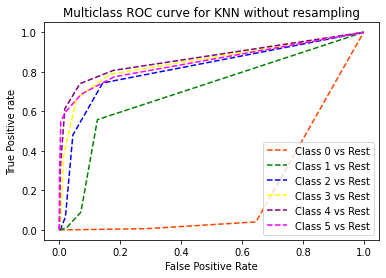

In [ ]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(6):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_knn, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for KNN without resampling')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for KNN without resampling',dpi=300)

In [ ]:
knn_classifier_SMOTE = KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski')
knn_classifier_SMOTE.fit(X_train_ures_SMOTE, y_train_ures_SMOTE)
y_pred_knn_SMOTE = knn_classifier_SMOTE.predict(X_test)

In [ ]:
pickle.dump(knn_classifier_SMOTE, open('knn_classifier_SMOTE.pkl', 'wb'))

In [ ]:
print('Performance of KNN Algorithm with SMOTE Upsampling:\n')
print(confusion_matrix(y_test, y_pred_knn_SMOTE))
print(classification_report(y_test, y_pred_knn_SMOTE))
print('Accuracy:',accuracy_score(y_test, y_pred_knn_SMOTE))
print('Precision:',precision_score(y_test, y_pred_knn_SMOTE, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_knn_SMOTE, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_knn_SMOTE, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_knn_SMOTE))

Performance of KNN Algorithm with SMOTE Upsampling:

[[41333  2786   484   209    58    10]
 [ 1886  4575  1029   172    41    11]
 [  291   974  2060   456    68    10]
 [   74   126   451   729   173    12]
 [   18    15    50   165   198    35]
 [    1     4     4     7    28    36]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.93     44880
           1       0.54      0.59      0.57      7714
           2       0.51      0.53      0.52      3859
           3       0.42      0.47      0.44      1565
           4       0.35      0.41      0.38       481
           5       0.32      0.45      0.37        80

    accuracy                           0.84     58579
   macro avg       0.51      0.56      0.53     58579
weighted avg       0.85      0.84      0.84     58579

Accuracy: 0.8352993393536933
Precision: 0.8450911406305827
Recall: 0.8352993393536933
F1 Score: 0.8397841105421386
Cohen Kappa Score: 0.5935324416116908


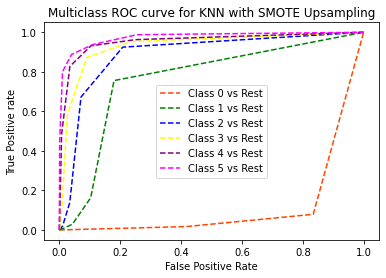

In [ ]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(6):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_knn_SMOTE, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for KNN with SMOTE Upsampling')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for KNN with SMOTE Upsampling',dpi=300)

#### <font color='violet'>Naive Bayes Algorithm without resampling

In [ ]:
NB_classifier = GaussianNB()
NB_classifier.fit(X_train, y_train)
y_pred_NB = NB_classifier.predict(X_test)

In [ ]:
pickle.dump(NB_classifier, open('NB_classifier.pkl', 'wb'))

In [ ]:
print('Performance of Naive Bayes Algorithm without resampling:\n')
print(confusion_matrix(y_test, y_pred_NB))
print(classification_report(y_test, y_pred_NB))
print('Accuracy:',accuracy_score(y_test, y_pred_NB))
print('Precision:',precision_score(y_test, y_pred_NB, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_NB, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_NB, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_NB))

Performance of Naive Bayes Algorithm without resampling:

[[40845  1418   757   617   185  1058]
 [ 6087   643   154   288   116   426]
 [ 2720   346    68   228   133   364]
 [  860   198    32   163    97   215]
 [  162    38    10    48    59   164]
 [    4     1     1     3    13    58]]
              precision    recall  f1-score   support

           0       0.81      0.91      0.85     44880
           1       0.24      0.08      0.12      7714
           2       0.07      0.02      0.03      3859
           3       0.12      0.10      0.11      1565
           4       0.10      0.12      0.11       481
           5       0.03      0.72      0.05        80

    accuracy                           0.71     58579
   macro avg       0.23      0.33      0.21     58579
weighted avg       0.66      0.71      0.68     58579

Accuracy: 0.7141808497925878
Precision: 0.6579695971760123
Recall: 0.7141808497925878
F1 Score: 0.6770935910042895
Cohen Kappa Score: 0.13216103477748187


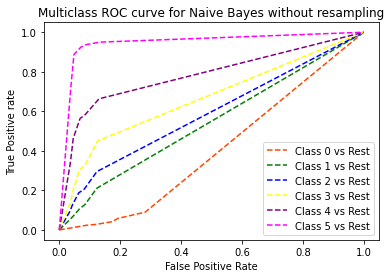

In [ ]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(6):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_NB, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Naive Bayes without resampling')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Naive Bayes without resampling',dpi=300)

#### <font color='darkgreen'>Random Forest Algorithm without resampling

In [ ]:
RF_classifier = RandomForestClassifier(n_estimators = 20, max_depth=70, random_state=0)
RF_classifier.fit(X_train, y_train)
y_pred_RF = RF_classifier.predict(X_test)

In [ ]:
print('Performance of RF Algorithm without resampling:\n')
print(confusion_matrix(y_test, y_pred_RF))
print(classification_report(y_test, y_pred_RF))
print('Accuracy:',accuracy_score(y_test, y_pred_RF))
print('Precision:',precision_score(y_test, y_pred_RF, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_RF, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_RF, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_RF))

Performance of RF Algorithm without resampling:

[[43548  1185   110    32     5     0]
 [ 3459  3530   638    77     8     2]
 [ 1057   843  1661   278    20     0]
 [  431   140   364   556    67     7]
 [   94    31    51   143   144    18]
 [   12     6     4     6    23    29]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93     44880
           1       0.62      0.46      0.52      7714
           2       0.59      0.43      0.50      3859
           3       0.51      0.36      0.42      1565
           4       0.54      0.30      0.39       481
           5       0.52      0.36      0.43        80

    accuracy                           0.84     58579
   macro avg       0.61      0.48      0.53     58579
weighted avg       0.82      0.84      0.83     58579

Accuracy: 0.8444664470202632
Precision: 0.8249749004528738
Recall: 0.8444664470202632
F1 Score: 0.8305945580184072
Cohen Kappa Score: 0.5527385392305406


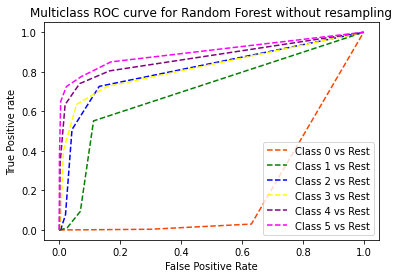

In [ ]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(6):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_RF, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Random Forest without resampling')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Random Forest without resampling',dpi=300)

In [ ]:
svm_classifier_nm = SVC(kernel='poly', degree=3, C = 1.0)
svm_classifier_nm.fit(X_train_dres_nm, y_train_dres_nm)
y_pred_svm_nm = svm_classifier_nm.predict(X_test)

In [ ]:
pickle.dump(svm_classifier_nm, open('svm_classifier_nm.pkl', 'wb'))

In [ ]:
print('Performance of SVM Algorithm with Near Miss downsampling:\n')
print(confusion_matrix(y_test, y_pred_svm_nm))
print(classification_report(y_test, y_pred_svm_nm))
print('Accuracy:',accuracy_score(y_test, y_pred_svm_nm))
print('Precision:',precision_score(y_test, y_pred_svm_nm, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_svm_nm, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_svm_nm, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_svm_nm))

Performance of SVM Algorithm with Near Miss downsampling:

[[ 1591 38206   862  3753   117   351]
 [  342  6397   166   621    25   163]
 [  177  2923   102   492    49   116]
 [   88   990    63   310    41    73]
 [   41   207    19   139    43    32]
 [   10    14     2    19     6    29]]
              precision    recall  f1-score   support

           0       0.71      0.04      0.07     44880
           1       0.13      0.83      0.23      7714
           2       0.08      0.03      0.04      3859
           3       0.06      0.20      0.09      1565
           4       0.15      0.09      0.11       481
           5       0.04      0.36      0.07        80

    accuracy                           0.14     58579
   macro avg       0.20      0.26      0.10     58579
weighted avg       0.57      0.14      0.09     58579

Accuracy: 0.14462520698543846
Precision: 0.5676708489746313
Recall: 0.14462520698543846
F1 Score: 0.0876433024767358
Cohen Kappa Score: 0.002094301657213027


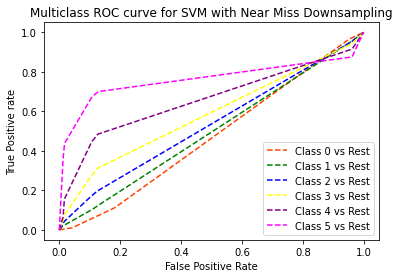

In [ ]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(6):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_svm_nm, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for SVM with Near Miss Downsampling')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for SVM with Near Miss Downsampling',dpi=300)

In [ ]:
#ARIMA and VARMAX Models


In [ ]:
import statsmodels.api as sm

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
#create train and test sets again.
X_train, X_test, y_train, y_test = train_test_split(independent_variables, target, test_size=0.2, random_state=0)

In [ ]:
print("Train features shape", X_train.shape)
print("Train target shape", y_train.shape)
print("Test features shape", X_test.shape)
print("Test target shape", y_test.shape)

Train features shape (234316, 15)
Train target shape (234316,)
Test features shape (58579, 15)
Test target shape (58579,)


In [ ]:
#Standardizing the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[ 0.35960201,  0.70283787,  0.70086525, ..., -0.55132922,
        -0.99218642,  1.61448675],
       [ 0.18459972,  1.47146266,  1.370856  , ..., -1.38471361,
         1.00787512,  1.38876007],
       [-3.0091919 , -0.9638643 , -0.54754149, ..., -0.50230661,
        -0.99218642,  0.37299003],
       ...,
       [ 0.06946664, -0.54516606, -0.36999862, ..., -1.16138838,
        -0.99218642, -1.65855006],
       [-0.61212119, -1.43919806, -2.13888631, ...,  2.24840659,
        -0.99218642, -1.2070967 ],
       [ 0.17078375,  1.4431449 ,  0.99801596, ..., -0.73107879,
         1.00787512, -0.98137003]])

In [ ]:
#model = sm.tsa.arima.ARIMA(, order=(5,1,0))
#print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                58579
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -74776.295
Date:                Thu, 08 Sep 2022   AIC                         149564.589
Time:                        22:58:41   BIC                         149618.458
Sample:                             0   HQIC                        149581.340
                              - 58579                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8307      0.004   -218.878      0.000      -0.838      -0.823
ar.L2         -0.6640      0.005   -137.344      0.000      -0.673      -0.655
ar.L3         -0.4956      0.005    -97.057      0.0

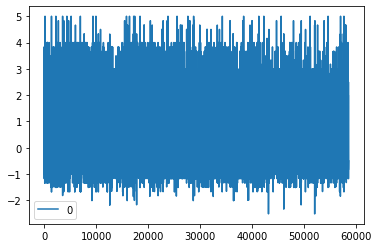

In [ ]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(y_pred_DT, order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())



from pandas import DataFrame
residual = DataFrame(model_fit.resid)
residual.plot()
plt.show()

In [ ]:
#Concatenate soil data and geoplot


In [ ]:
print('Performance of Sarimax Model:\n')
print(confusion_matrix(y_test, y_pred_DT))
print(classification_report(y_test, y_pred_DT))
print('Accuracy:',accuracy_score(y_test, y_pred_DT))
print('Precision:',precision_score(y_test, y_pred_DT, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_DT, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_DT, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_DT))